# **PROGRAMMING FOR DATA SCIENCE: Final Project**

**Student:** Anna Bicelli <br> 
**ID:** VR509594

# Dataset import and Data cleaning

brief explanation of the dataset, where I found it and waht i analyzes and what it contains
This dataset covers Airbnb activity in New York City and is available at the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata . <br>
<br>
It reports the listing activity of homestays in New York City, their reviews, prices, availability, location, room types and cancellation policies.




**packages:**

In [229]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium

In [341]:
# To see all the columns of the DataFrame
pd.set_option('display.max_columns', None)

In [231]:
# Load CSV file into DataFrame
airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


C:\Users\bicel\AppData\Local\Temp\ipykernel_26868\4082681128.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


Since this dataset in column 25 has some mixted types values, I've to check them

In [232]:
airbnb_df.head(15).T

0   \
id                                                                        1001254   
NAME                                           Clean & quiet apt home by the park   
host id                                                               80014485718   
host_identity_verified                                                unconfirmed   
host name                                                                Madaline   
neighbourhood group                                                      Brooklyn   
neighbourhood                                                          Kensington   
lat                                                                      40.64749   
long                                                                    -73.97237   
country                                                             United States   
country code                                                                   US   
instant_bookable                                                            False   
cancellation_policy                                                        strict   
room type                                                            Private room   
Construction year                                                          2020.0   
price                                                                       $966    
service fee                                                                 $193    
minimum nights                                                               10.0   
number of reviews                                                             9.0   
last review                                                            10/19/2021   
reviews per month                                                            0.21   
review rate number                                                            4.0   
calculated host listings count                                                6.0   
availability 365                                                            286.0   
house_rules                     Clean up and treat the home the way you'd like...   
license                                                                       NaN   

                                                                               1   \
id                                                                        1002102   
NAME                                                        Skylit Midtown Castle   
host id                                                               52335172823   
host_identity_verified                                                   verified   
host name                                                                   Jenna   
neighbourhood group                                                     Manhattan   
neighbourhood                                                             Midtown   
lat                                                                      40.75362   
long                                                                    -73.98377   
country                                                             United States   
country code                                                                   US   
instant_bookable                                                            False   
cancellation_policy                                                      moderate   
room type                                                         Entire home/apt   
Construction year                                                          2007.0   
price                                                                       $142    
service fee                                                                  $28    
minimum nights                                                               30.0   
number of reviews                                                            45.0   
last review                                                             5/21/2022  

In [233]:
airbnb_df.tail()

id                              NAME      host id  \
102594  6092437        Spare room in Williamsburg  12312296767   
102595  6092990     Best Location near Columbia U  77864383453   
102596  6093542    Comfy, bright room in Brooklyn  69050334417   
102597  6094094  Big Studio-One Stop from Midtown  11160591270   
102598  6094647              585 sf Luxury Studio  68170633372   

       host_identity_verified    host name neighbourhood group  \
102594               verified         Krik            Brooklyn   
102595            unconfirmed        Mifan           Manhattan   
102596            unconfirmed        Megan            Brooklyn   
102597            unconfirmed  Christopher              Queens   
102598            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country country code  \
102594         Williamsburg  40.70862 -73.94651  United States           US   
102595  Morningside Heights  40.80460 -73.96545  United States           US   
102596           Park Slope  40.67505 -73.98045  United States           US   
102597     Long Island City  40.74989 -73.93777  United States           US   
102598      Upper West Side  40.76807 -73.98342  United States           US   

       instant_bookable cancellation_policy        room type  \
102594            False            flexible     Private room   
102595             True            moderate     Private room   
102596             True            moderate     Private room   
102597             True              strict  Entire home/apt   
102598            False            flexible  Entire home/apt   

        Construction year    price service fee  minimum nights  \
102594             2003.0    $844        $169              1.0   
102595             2016.0    $837        $167              1.0   
102596             2009.0    $988        $198              3.0   
102597             2015.0    $546        $109              2.0   
102598             2010.0  $1,032        $206              1.0   

        number of reviews last review  reviews per month  review rate number  \
102594                0.0         NaN                NaN                 3.0   
102595                1.0    7/6/2015               0.02                 2.0   
102596                0.0         NaN                NaN                 5.0   
102597                5.0  10/11/2015               0.10                 3.0   
102598                0.0         NaN                NaN                 3.0   

        calculated host listings count  availability 365  \
102594                             1.0             227.0   
102595                             2.0             395.0   
102596                             1.0             342.0   
102597                             1.0             386.0   
102598                             1.0              69.0   

                                              house_rules license  
102594  No Smoking No Parties or Events of any kind Pl...     NaN  
102595  House rules: Guests agree to the following ter...     NaN  
102596                                                NaN     NaN  
102597                                                NaN     NaN  
102598                                                NaN     NaN

In [234]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [235]:
airbnb_df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

to check which is the problematic column:

In [236]:
airbnb_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

I see that the column indixes need to be fixed, I will do that later, now I continue with the search for the problematic values that are contained in the 25th column

In [237]:
column25 = airbnb_df.columns[24]  # the first index is 0 so the 25th column has index 24
print(column25)

house_rules


the problematic columns has name `house_rules`. Now I've to check her values to see what is the problem

In [238]:
print(f"percentage of house_rules NA value: \t{(airbnb_df['house_rules'].isna().sum() / len(airbnb_df)) * 100:.2f}%")

percentage of house_rules NA value: 	50.81%


In [239]:
airbnb_df.house_rules.value_counts()

house_rules
#NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

As we can see there's the value **#HOUSE?** that is problematic because is a different type from all other values in this column and it can cause some problems during the analysis so I can **replace** these values with *NaN*:

In [240]:
airbnb_df=airbnb_df.replace('#NAME?', np.nan)

In [241]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

now I have more null values than before in the `house_rules` column obviuosly:

In [242]:
airbnb_df.isnull().sum()

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

I want to check that there are no more problematic values in the `house_rules` columns

In [243]:
airbnb_df.house_rules.value_counts()

house_rules
House Rules 1. Check-in is 4 pm local time. If the unit is ready earlier, we’ll let you know. Check-out is normally 11 am local time, but we’d be happy to extend it as long as we don’t have a cleaning scheduled. Just let us know.  2. All bookings require a security deposit of at least $300, which will be refunded within 7 days of your check-out. 3. For security measures we require all guests to provide proof of identification through ID verification on our own website. In order to check in we'll need a photo of your ID.  4. Our cancellation policy is as shown on our ad and defined by the site you are booking through.  5. Don’t let $300 go up in smoke. There's no smoking allowed in any Flatbook and a $300 fine for breaking this rule.  6. Unfortunately we don’t allow pets in any of our apartments. 7. Unless you’re staying in one of our specialty apartments, we don’t allow parties or excessive noise. 8. If we find the place very messy, we have to charge an extra $40 for every 

I don't have problematic values anymore and i can start my analysis.<br>As seen before, gli indici di colonna devono essere sistemati: 

In [244]:
airbnb_df.columns = airbnb_df.columns.map(lambda x: x.lower().replace(' ', '_'))

In [245]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [246]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [247]:
airbnb_df.shape

(102599, 26)

observing the size of the dataset it has 26 columns and 102599 rows, so I can see which variables have an eccessive number of NA values

In [248]:
print(sum(airbnb_df.isna().sum()))
print(airbnb_df.duplicated().sum())

193503
541


# Check null values

to check in which columns I've more null values:

In [249]:
airbnb_df.isnull().sum()

id                                     0
name                                 270
host_id                                0
host_identity_verified               289
host_name                            408
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

I remove the dollar sign $ and the commas in the `price` and `service fee` columns and transform them from object to float:

In [250]:
airbnb_df.price = airbnb_df.price.replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df.price

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

In [251]:
airbnb_df.service_fee = airbnb_df.service_fee.replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df.service_fee 


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service_fee, Length: 102599, dtype: float64

The columns of the airbnb dataset are of different types: **object**, **float**, **integer**, so I prefer to divide them in order to see better which columns contain float values, integers and objects

In [252]:
# Null values in columns of float type
null_float_columns = airbnb_df.select_dtypes(include=['float']).isnull().sum()
print("Null values in columns of float type:")
print(null_float_columns)

# Null values in columns of object type
null_text_columns = airbnb_df.select_dtypes(include=['object']).isnull().sum()
print("\nNull values in columns of object type:")
print(null_text_columns)

# Null values in columns of integer type
null_int_columns = airbnb_df.select_dtypes(include=['int']).isnull().sum()
print("\nNull values in columns of integer type:")
print(null_int_columns)

Null values in columns of float type:
lat                                   8
long                                  8
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
dtype: int64

Null values in columns of object type:
name                         270
host_identity_verified       289
host_name                    408
neighbourhood_group           29
neighbourhood                 16
country                      532
country_code                 131
instant_bookable             105
cancellation_policy           76
room_type                      0
last_review                15893
house_rules                54843
license                   102597
dtype: int64

Null values in columns of 

In [253]:
#for float variables
print("Percentage of null values in columns of float type:")
print(f"percentage of lat NA value: \t\t\t\t\t\t{(airbnb_df['lat'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of long NA value: \t\t\t\t\t\t{(airbnb_df['long'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of price NA value:\t\t\t\t\t\t {(airbnb_df['price'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of service_fee NA value:\t\t\t\t\t {(airbnb_df['service_fee'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of construction_year NA value: \t\t\t\t{(airbnb_df['construction_year'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of minimum_nights NA value: \t\t\t\t\t{(airbnb_df['minimum_nights'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of number_of_reviews NA value: \t\t\t\t{(airbnb_df['number_of_reviews'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of reviews_per_month NA value: \t\t\t\t{(airbnb_df['reviews_per_month'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of review_rate_number NA value: \t\t\t\t{(airbnb_df['review_rate_number'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of calculated_host_listings_count NA value: \t\t\t{(airbnb_df['calculated_host_listings_count'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of availability_365 NA value: \t\t\t\t{(airbnb_df['availability_365'].isna().sum()/len(airbnb_df))*100:.2f}%")

Percentage of null values in columns of float type:
percentage of lat NA value: 						0.01%
percentage of long NA value: 						0.01%
percentage of price NA value:						 0.24%
percentage of service_fee NA value:					 0.27%
percentage of construction_year NA value: 				0.21%
percentage of minimum_nights NA value: 					0.40%
percentage of number_of_reviews NA value: 				0.18%
percentage of reviews_per_month NA value: 				15.48%
percentage of review_rate_number NA value: 				0.32%
percentage of calculated_host_listings_count NA value: 			0.31%
percentage of availability_365 NA value: 				0.44%


Based on these information:<br>
- **replace** the null values related to *float* data with their **mean value** because the percentages are really close to zero.<br>
- **remove** the variable `reviews_per_month`,  from the variable itself. The percentage of null values is excessive and would not lead to useful information for the dataset.<br>
- **drop** the NaN values in the columns `price` and `service_fee`.

In [254]:
lat_mean = airbnb_df['lat'].mean()
airbnb_df['lat'].fillna(lat_mean, inplace=True)

long_mean = airbnb_df['long'].mean()
airbnb_df['long'].fillna(long_mean, inplace=True)

construction_year_mean = airbnb_df['construction_year'].mean()
airbnb_df['construction_year'].fillna(construction_year_mean, inplace=True)

minimum_nights_mean = airbnb_df['minimum_nights'].mean()
airbnb_df['minimum_nights'].fillna(minimum_nights_mean, inplace=True)

number_of_reviews_mean = airbnb_df['number_of_reviews'].mean()
airbnb_df['number_of_reviews'].fillna(number_of_reviews_mean, inplace=True)

review_rate_number_mean = airbnb_df['review_rate_number'].mean()
airbnb_df['review_rate_number'].fillna(review_rate_number_mean, inplace=True)

calculated_host_listings_count_mean = airbnb_df['calculated_host_listings_count'].mean()
airbnb_df['calculated_host_listings_count'].fillna(calculated_host_listings_count_mean, inplace=True)

availability_365_mean = airbnb_df['availability_365'].mean()
airbnb_df['availability_365'].fillna(availability_365_mean, inplace=True)

In [255]:
airbnb_df.drop(columns = [ "reviews_per_month"], axis=1, inplace = True)

In [256]:
airbnb_df.dropna(subset=['price'],inplace=True)
airbnb_df.dropna(subset=['service_fee'],inplace=True)


In [257]:
#check
airbnb_df.isnull().sum()

id                                     0
name                                 267
host_id                                0
host_identity_verified               284
host_name                            403
neighbourhood_group                   28
neighbourhood                         15
lat                                    0
long                                   0
country                              527
country_code                         122
instant_bookable                      96
cancellation_policy                   71
room_type                              0
construction_year                      0
price                                  0
service_fee                            0
minimum_nights                         0
number_of_reviews                      0
last_review                        15843
review_rate_number                     0
calculated_host_listings_count         0
availability_365                       0
house_rules                        54551
license         

In [258]:
# for object type
print("Percentage of null values in columns of text or object type:")
print(f"\npercentage of name NA value: \t\t\t\t{(airbnb_df['name'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of host_identity_verified NA value:\t\t {(airbnb_df['host_identity_verified'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of host_name NA value:\t\t\t {(airbnb_df['host_name'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of neighbourhood_group NA value:\t\t {(airbnb_df['neighbourhood_group'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of neighbourhood NA value: \t\t\t{(airbnb_df['neighbourhood'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of country NA value:\t\t\t\t {(airbnb_df['country'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of country_code NA value: \t\t\t{(airbnb_df['country_code'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of instant_bookable NA value:\t\t {(airbnb_df['instant_bookable'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of cancellation_policy NA value:\t\t{(airbnb_df['cancellation_policy'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of last_review NA value: \t\t\t{(airbnb_df['last_review'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of house_rules NA value: \t\t\t{(airbnb_df['house_rules'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of license NA value: \t\t\t{(airbnb_df['license'].isna().sum() / len(airbnb_df)) * 100:.3f}%")

Percentage of null values in columns of text or object type:

percentage of name NA value: 				0.26%
percentage of host_identity_verified NA value:		 0.28%
percentage of host_name NA value:			 0.39%
percentage of neighbourhood_group NA value:		 0.03%
percentage of neighbourhood NA value: 			0.01%
percentage of country NA value:				 0.52%
percentage of country_code NA value: 			0.12%
percentage of instant_bookable NA value:		 0.09%
percentage of cancellation_policy NA value:		0.07%
percentage of last_review NA value: 			15.52%
percentage of house_rules NA value: 			53.42%
percentage of license NA value: 			99.998%


I decide to:
-  **drop** the columns `last_review`,`license` and `house_rules` because the percentage of null values is excessive and would not lead to useful information
<br>The `house_rules` column is the one in which there were problematic values that I replaced with null values, being null more than half of the values of this variable means that I can delete the column.<br>
- **replace** the null values related to *object* variables with the **mode** that is the value that occurs the most in the variable, so it doesn't change the distribution a lot

In [259]:
name_mode = airbnb_df['name'].mode()[0]
airbnb_df['name'].fillna(name_mode, inplace=True)

host_identity_verified_mode = airbnb_df['host_identity_verified'].mode()[0]
airbnb_df['host_identity_verified'].fillna(host_identity_verified_mode, inplace=True)

host_name_mode = airbnb_df['host_name'].mode()[0]
airbnb_df['host_name'].fillna(host_name_mode, inplace=True)

neighbourhood_group_mode = airbnb_df['neighbourhood_group'].mode()[0]
airbnb_df['neighbourhood_group'].fillna(neighbourhood_group_mode, inplace=True)

neighbourhood_mode = airbnb_df['neighbourhood'].mode()[0]
airbnb_df['neighbourhood'].fillna(neighbourhood_mode, inplace=True)

country_mode = airbnb_df['country'].mode()[0]
airbnb_df['country'].fillna(country_mode, inplace=True)

country_code_mode = airbnb_df['country_code'].mode()[0]
airbnb_df['country_code'].fillna(country_code_mode, inplace=True)

instant_bookable_mode = airbnb_df['instant_bookable'].mode()[0]
airbnb_df['instant_bookable'].fillna(instant_bookable_mode, inplace=True)

cancellation_policy_mode = airbnb_df['cancellation_policy'].mode()[0]
airbnb_df['cancellation_policy'].fillna(cancellation_policy_mode, inplace=True)

room_type_mode = airbnb_df['room_type'].mode()[0]
airbnb_df['room_type'].fillna(room_type_mode, inplace=True)

In [260]:
airbnb_df.drop(columns = ["license","house_rules", "last_review"], axis=1, inplace = True)

In [261]:
airbnb_df.shape

(102113, 22)

I see that the size of the dataframe has reduced after removing the four unwanted columns.<br>
Now I check again for NA values as I did before

In [262]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country_code                      0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now that all the null values are settled I can proceed with the understanding of the values in the dataset, finding correlations between them. 

# Analysis of the values and correlations

At this point I want to understand how the data are distributed within the main variables in order to find the most significant variables and some interesting aspects to analyze later.

In [263]:
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43613
Brooklyn         41648
Queens           13201
Bronx             2700
Staten Island      950
brookln              1
Name: count, dtype: int64

I can see that brookln matches Brooklyn so I want to combine those values and also manhattan matches Manhattan:

In [264]:
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace({"brookln": "Brooklyn"})
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace({"manhatan": "Manhattan"})

In [265]:
#check
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43613
Brooklyn         41649
Queens           13201
Bronx             2700
Staten Island      950
Name: count, dtype: int64

In [266]:
airbnb_df.neighbourhood.value_counts()

neighbourhood
Bedford-Stuyvesant        7914
Williamsburg              7740
Harlem                    5442
Bushwick                  4953
Hell's Kitchen            3955
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

In [267]:
airbnb_df.country.value_counts()

country
United States    102113
Name: count, dtype: int64

Obviously, since this is a dataset regarding airbnbs in New York City all are located in the United States.

In [268]:
airbnb_df.room_type.value_counts()

room_type
Entire home/apt    53454
Private room       46330
Shared room         2215
Hotel room           114
Name: count, dtype: int64

In [269]:
airbnb_df.construction_year.value_counts()

construction_year
2014.000000    5213
2008.000000    5200
2006.000000    5196
2019.000000    5174
2009.000000    5144
2020.000000    5136
2010.000000    5135
2005.000000    5116
2022.000000    5112
2012.000000    5105
2003.000000    5097
2007.000000    5086
2015.000000    5074
2017.000000    5042
2011.000000    5041
2018.000000    5030
2021.000000    5015
2004.000000    5010
2013.000000    4993
2016.000000    4990
2012.487464     204
Name: count, dtype: int64

In [270]:
airbnb_df.construction_year.dtype

dtype('float64')

In the `construction_year` column there is the value 
2012.487464, but since it's a year, I don't want it to be float and I turn them all into int

In [271]:
airbnb_df.construction_year = airbnb_df.construction_year.astype(int)

In [272]:
#check
airbnb_df.construction_year.value_counts()

construction_year
2012    5309
2014    5213
2008    5200
2006    5196
2019    5174
2009    5144
2020    5136
2010    5135
2005    5116
2022    5112
2003    5097
2007    5086
2015    5074
2017    5042
2011    5041
2018    5030
2021    5015
2004    5010
2013    4993
2016    4990
Name: count, dtype: int64

In [273]:
airbnb_df.minimum_nights.value_counts()

minimum_nights
 1.0      25316
 2.0      23509
 3.0      16048
 30.0     11567
 4.0       6602
          ...  
-3.0          1
 273.0        1
 175.0        1
 98.0         1
 825.0        1
Name: count, Length: 154, dtype: int64

I see that in the `minimum night` column there are negative values, but it is not possible that the minimum number of nights you have to stay in an airbnbs is negative, so there is inconsistency in the data. <br>
 I decide to **replace** the negative cells with 1, because a guest stays at least one night in the aribnb

In [274]:
airbnb_df[airbnb_df['minimum_nights']<0].head(5)

id                                            name      host_id  \
176  1098541             BROOKLYN VICTORIAN STYLE SUITE.....  83631499592   
352  1195746  Beautiful, Bright’s, Warm & Spacious 1.5BR Apt   2227683633   
398  1221151              SUPER BIG AND COZY PRIVATE BEDROOM  50336791874   
421  1233854                     Charming Nolita Apartment!!   7389895192   
441  1244900                  Cozy apartment in a brownstone  81186886194   

    host_identity_verified  host_name neighbourhood_group  neighbourhood  \
176            unconfirmed  Frederick            Brooklyn    Fort Greene   
352            unconfirmed      Grant            Brooklyn  Crown Heights   
398               verified     Tucker            Brooklyn     Kensington   
421               verified    Belinda           Manhattan         Nolita   
441               verified   Adelaide           Manhattan         Harlem   

          lat      long        country country_code  instant_bookable  \
176  40.69098 -73.97113  United States           US             False   
352  40.67174 -73.95663  United States           US             False   
398  40.64302 -73.97255  United States           US             False   
421  40.72094 -73.99706  United States           US             False   
441  40.80497 -73.95016  United States           US             False   

    cancellation_policy        room_type  construction_year   price  \
176            flexible     Private room               2008  1155.0   
352            moderate  Entire home/apt               2009    73.0   
398            flexible     Private room               2015   779.0   
421            flexible  Entire home/apt               2008   874.0   
441            moderate  Entire home/apt               2021   920.0   

     service_fee  minimum_nights  number_of_reviews  review_rate_number  \
176        231.0           -10.0              213.0                 5.0   
352         15.0            -5.0              104.0                 5.0   
398        156.0            -1.0               82.0                 2.0   
421        175.0           -10.0               68.0                 5.0   
441        184.0           -12.0              203.0                 5.0   

     calculated_host_listings_count  availability_365  
176                             2.0              19.0  
352                             1.0              31.0  
398                             2.0             131.0  
421                             1.0              13.0  
441                             3.0              77.0

In [275]:
#  select the rows with negative 'minimum_nights' and assign them the value 1
airbnb_df.loc[airbnb_df['minimum_nights'] < 0, 'minimum_nights'] = 1

In [276]:
# check
airbnb_df.minimum_nights.value_counts()

minimum_nights
1.0      25329
2.0      23509
3.0      16048
30.0     11567
4.0       6602
         ...  
198.0        1
81.0         1
43.0         1
160.0        1
825.0        1
Name: count, Length: 144, dtype: int64

In [277]:
# another check
airbnb_df[airbnb_df['minimum_nights']<0]

Empty DataFrame
Columns: [id, name, host_id, host_identity_verified, host_name, neighbourhood_group, neighbourhood, lat, long, country, country_code, instant_bookable, cancellation_policy, room_type, construction_year, price, service_fee, minimum_nights, number_of_reviews, review_rate_number, calculated_host_listings_count, availability_365]
Index: []

In [278]:
airbnb_df.number_of_reviews.value_counts()

number_of_reviews
0.0      15684
1.0      10331
2.0       7129
3.0       5350
4.0       4136
         ...  
567.0        1
592.0        1
797.0        1
966.0        1
300.0        1
Name: count, Length: 477, dtype: int64

In [279]:
airbnb_df.review_rate_number.value_counts()

review_rate_number
5.000000    23257
4.000000    23212
3.000000    23167
2.000000    22989
1.000000     9162
3.279106      326
Name: count, dtype: int64

In [280]:
airbnb_df.calculated_host_listings_count.value_counts()

calculated_host_listings_count
1.0     63137
2.0     14390
3.0      6546
4.0      3539
5.0      1986
        ...  
22.0       20
86.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 79, dtype: int64

In [281]:
airbnb_df.host_identity_verified.value_counts()

host_identity_verified
unconfirmed    51254
verified       50859
Name: count, dtype: int64

Which is the percentage of hosts who have confirmed their identity?

In [282]:
# Filter only 'verified' values
verified_counts = airbnb_df['host_identity_verified'].value_counts()['verified']

# Calculates the percentage of hosts who confirmed their identity out of the total number of hosts
percent_verified = (verified_counts / len(airbnb_df)) * 100

print(f"The percentage of hosts who confirmed their identity is: {percent_verified:.2f}%")


The percentage of hosts who confirmed their identity is: 49.81%


In [283]:
airbnb_df.availability_365.value_counts()

availability_365
 0.0       23412
 365.0      2493
 364.0      1162
 89.0        749
 1.0         734
           ...  
 408.0        33
-6.0          32
 391.0        30
 401.0        29
 3677.0        1
Name: count, Length: 439, dtype: int64

Now I wnat to check the correlations between the variables of this dataframe

In [284]:
airbnb_df_corr = airbnb_df.corr(numeric_only=True)
airbnb_df_corr

id   host_id       lat      long  \
id                              1.000000 -0.000339 -0.009009  0.042449   
host_id                        -0.000339  1.000000  0.000759 -0.008746   
lat                            -0.009009  0.000759  1.000000  0.073994   
long                            0.042449 -0.008746  0.073994  1.000000   
instant_bookable                0.005671  0.003669  0.000700 -0.004377   
construction_year               0.001239  0.004645  0.005658  0.000821   
price                           0.007009  0.003558 -0.005751  0.003206   
service_fee                     0.007009  0.003539 -0.005728  0.003201   
minimum_nights                  0.005285 -0.001632  0.015673 -0.039281   
number_of_reviews              -0.040946 -0.004414 -0.025283  0.069097   
review_rate_number              0.036271  0.003512 -0.003742  0.015310   
calculated_host_listings_count  0.023724  0.001709  0.032503 -0.104766   
availability_365               -0.138228 -0.002488 -0.005010  0.058499   

                                instant_bookable  construction_year     price  \
id                                      0.005671           0.001239  0.007009   
host_id                                 0.003669           0.004645  0.003558   
lat                                     0.000700           0.005658 -0.005751   
long                                   -0.004377           0.000821  0.003206   
instant_bookable                        1.000000           0.002242  0.000468   
construction_year                       0.002242           1.000000 -0.003689   
price                                   0.000468          -0.003689  1.000000   
service_fee                             0.000468          -0.003668  0.999991   
minimum_nights                         -0.002573          -0.000841 -0.002983   
number_of_reviews                       0.000504           0.001684  0.005192   
review_rate_number                      0.002735           0.005160 -0.004383   
calculated_host_listings_count         -0.000281          -0.002731 -0.000201   
availability_365                       -0.004517          -0.008803 -0.003046   

                                service_fee  minimum_nights  \
id                                 0.007009        0.005285   
host_id                            0.003539       -0.001632   
lat                               -0.005728        0.015673   
long                               0.003201       -0.039281   
instant_bookable                   0.000468       -0.002573   
construction_year                 -0.003668       -0.000841   
price                              0.999991       -0.002983   
service_fee                        1.000000       -0.002967   
minimum_nights                    -0.002967        1.000000   
number_of_reviews                  0.005169       -0.050118   
review_rate_number                -0.004385       -0.002878   
calculated_host_listings_count    -0.000194        0.084848   
availability_365                  -0.003039        0.060405   

                                number_of_reviews  review_rate_number  \
id                                      -0.040946            0.036271   
host_id                                 -0.004414            0.003512   
lat                                     -0.025283           -0.003742   
long                                     0.069097            0.015310   
instant_bookable                         0.000504            0.002735   
construction_year                        0.001684            0.005160   
price                                    0.005192           -0.004383   
service_fee                              0.005169           -0.004385   
minimum_nights                          -0.050118           -0.002878   
number_of_reviews                        1.000000           -0.018033   
review_rate_number                      -0.018033            1.000000   
calculated_host_listings_count          -0.080601            0.024032   
availability_365                  

<function matplotlib.pyplot.show(close=None, block=None)>

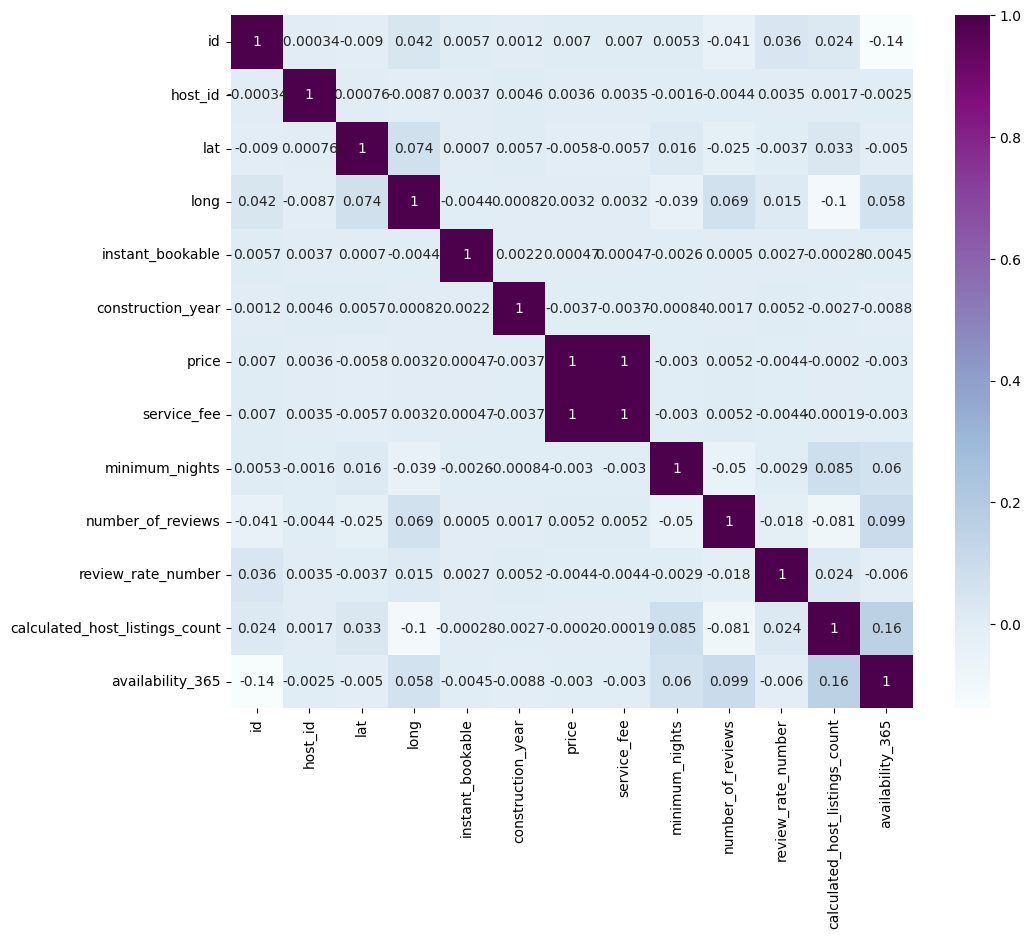

In [285]:
plt.figure(figsize=(11,9))
sns.heatmap(airbnb_df_corr, annot=True, cmap="BuPu")#BuPu
plt.show

I see that all numeric variables are correlated with each other, except `price` and `service_fee` which are perfectly positively correlated.

SCATTER PLOT useful to visualize the relatioship between two continuous variables and I can use the Seaborn's scatterplot() function to create them.

per le vairbaili categoriche (object) posso usare scatterplots per studiare la distribuzione dele varibaili e osservarne la correlazione graficamente con quelle numeriche  piu interessanti

tipo construction year vs host id e vedere per lat, per long, neighoordo group e neighboorood, room type per vedere se ce una relazione tra ò host e l anno di costruzione con il neighoordoo o la tipologia di camere

guarda correlazione tra reveiws rate number e host_name

poi qualcosa tra price e service fee

cerca correlazione tra neighboorod e price o con plot o con scatter e anche tra review_rate e price per vedere se all aumentare del numero di rece cambia wualcosa nel prezzo

In [286]:
#sns.pairplot(airbnb_df)

ELIMINA TUTTI QUESTI SCATTER PLOT--> li uso ora per vedere velocemente le relazioni

I want to check the room type  più ricorrente negli anni:per vedere se negli ultimi anni la maggior parte degli airbnb sono Entire home/apt, Private room , Shared room, Hotel room:

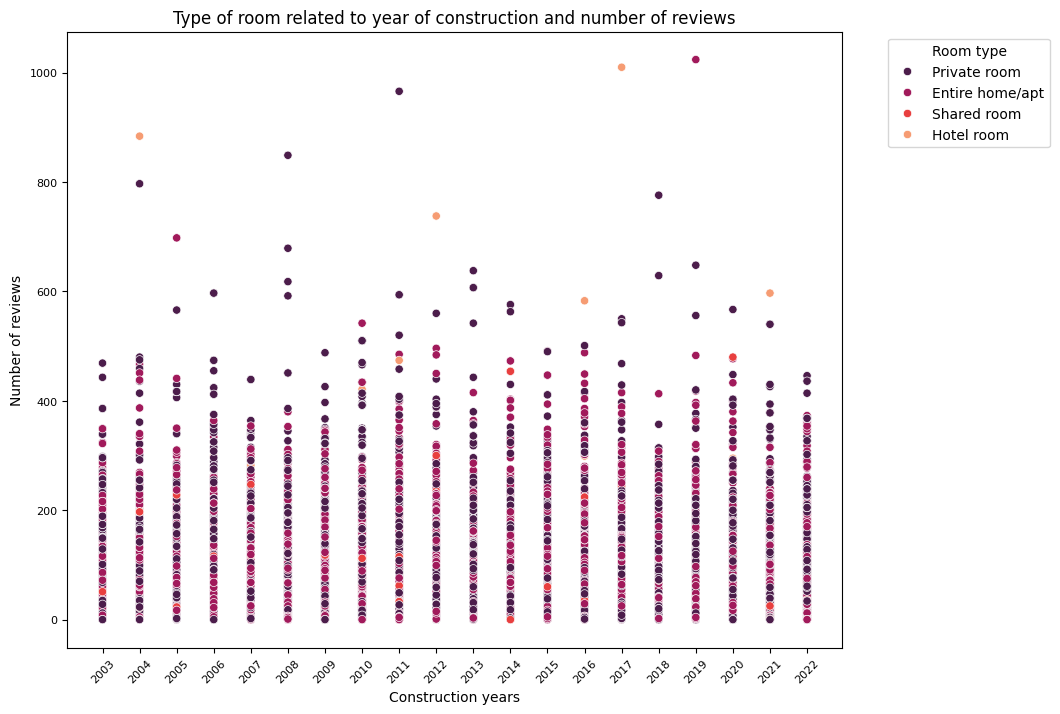

In [287]:
plt.figure(figsize=(10, 8))
plt.xlabel('Construction years')
plt.ylabel('Number of reviews')
plt.title('Type of room related to year of construction and number of reviews')
plt.xticks(rotation=45)  

# Interval of years and x-axis labels
years = range(airbnb_df['construction_year'].min(), airbnb_df['construction_year'].max() + 1)
plt.xticks(ticks=years, labels=years, fontsize=8)

plt.yticks(rotation=0, fontsize=8)
sns.scatterplot(data=airbnb_df, x='construction_year', y='number_of_reviews', hue='room_type', palette='rocket')
plt.legend(title='Room type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#ELIMINO???

la maggiorn parte degli airbnbs costruti dal 2003 al 2022 sono private room e entire home/apartament--> non vedo nietne di speciale--> ELIMINO??? non ci sono anni in cui si vede un andamento di costruzione diverso rispetto agli altri, sempre piu private room e entire apt

<br> dopo di questo ho guardato anno in cui sono stti costuiri piu airbnbs

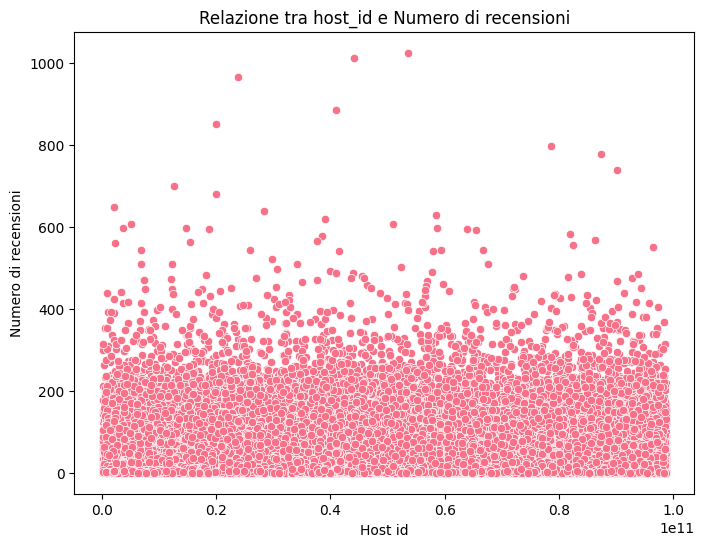

In [288]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='host_id', y='number_of_reviews')
plt.xlabel('Host id')
plt.ylabel('Numero di recensioni')
plt.title('Relazione tra host_id e Numero di recensioni')
plt.show()

vedo che asse x è strana --> questo perche host id sarebbe un codice non un numero quindi io ELIMINEREI QUESTO SCATTERPLOT PERCHE NON HA SENSO CON ASSE X COSI

OPPURE PROVO A TRASFORMARE HSOT ID IN STRINGA PERO POI NON POSSO PIU FARE LO SCATTER PLOT QUINDI NON MI CONVIENE 

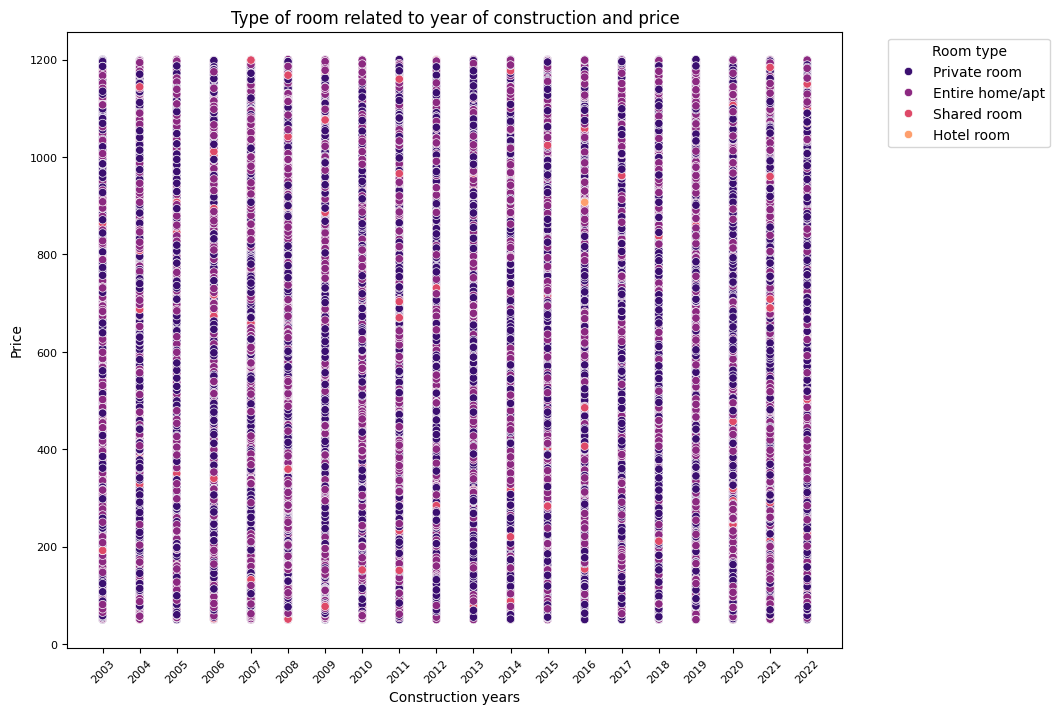

In [289]:
plt.figure(figsize=(10, 8))
plt.xlabel('Construction years')
plt.ylabel('Price')
plt.title('Type of room related to year of construction and price')
plt.xticks(rotation=45)  # Rotazione delle etichette sull'asse x per una migliore leggibilità

# Definisci l'intervallo degli anni e le etichette degli assi x
years = range(airbnb_df['construction_year'].min(), airbnb_df['construction_year'].max() + 1)
plt.xticks(ticks=years, labels=years, fontsize=8)

plt.yticks(rotation=0, fontsize=8)
sns.scatterplot(data=airbnb_df, x='construction_year', y='price', hue='room_type', palette='magma')
plt.legend(title='Room type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#TENGOO?

QUA NON VEDO NIENTE DI SPECIALE E NON è UN BEL PLOT --> ELIMINEREI

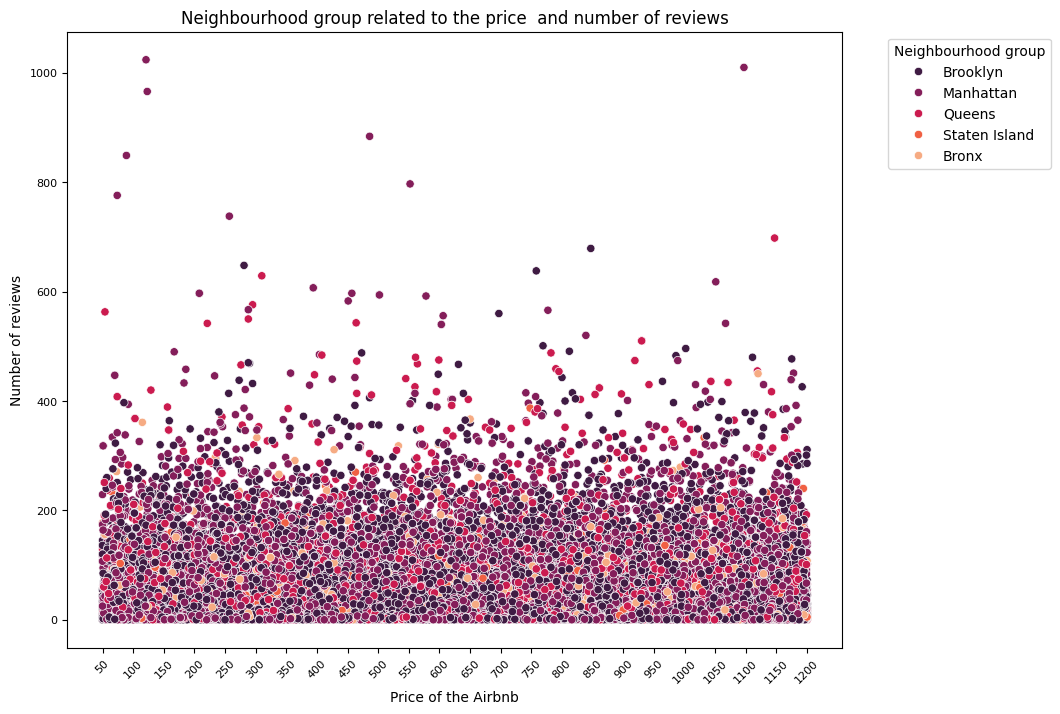

In [290]:
plt.figure(figsize=(10, 8))
plt.xlabel('Price of the Airbnb')
plt.ylabel('Number of reviews')
plt.title('Neighbourhood group related to the price  and number of reviews')
plt.xticks(rotation=45)

# Definisci l'intervallo dei prezzi e le etichette degli assi x
# Modifica gli intervalli e l'incremento a seconda dei tuoi dati
prezzi = range(int(airbnb_df['price'].min()), int(airbnb_df['price'].max()) + 1, 50)
plt.xticks(ticks=prezzi, labels=prezzi, fontsize=8)

plt.yticks(rotation=0, fontsize=8)
sns.scatterplot(data=airbnb_df, x='price', y='number_of_reviews', hue='neighbourhood_group', palette='rocket')
plt.legend(title='Neighbourhood group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#TENGOOO????

Non vedo niente di speciale nei prezzi, vedo che sono distribuiti uniformemetne tutte le tipologie di camere prendono tutti i prezzi--> ELIMINEREI

la maggior parte degli host ha poche recensioni, ce ne sono solo pochi che hanno piu di 1000 recensioni

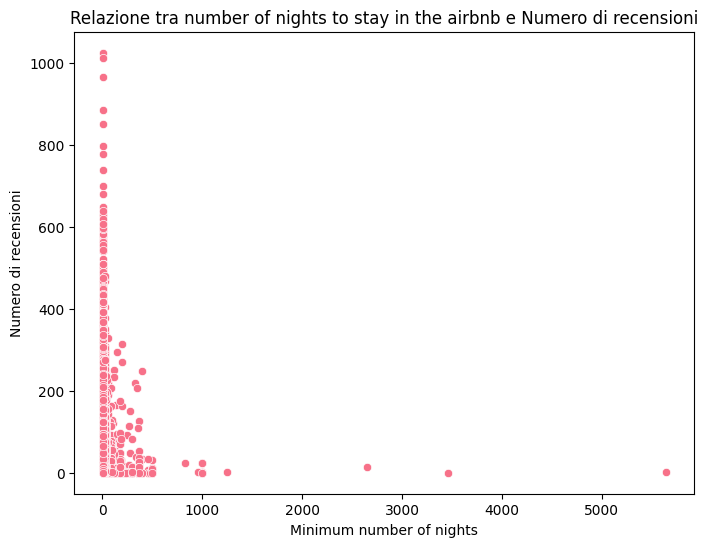

In [291]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='minimum_nights', y='number_of_reviews')
plt.xlabel('Minimum number of nights')
plt.ylabel('Numero di recensioni')
plt.title('Relazione tra number of nights to stay in the airbnb e Numero di recensioni')
plt.show()

il numero minimo di notti è basso, infatti la maggior parte si trova intorno nell'intervallo da 1 notte a 1 mese e noto che man mnao che aumenta il numero minimo di notti, il numero di recensioni cala, potrebbe essere dovuto al fatto che ci sono stati pochi ospiti siccome si ha un minimo numero di notti in cui alloggiare li elevato e non hanno recensito tutti. vedo invece che per airbnbs con un numero basso di notti minime ci sono parecchie recensioni,a nche più di 1000 e voglio investigare meglio questi valori:

In [292]:
min_night_rew=airbnb_df.groupby('minimum_nights')['number_of_reviews'].max()
min_night_rew

minimum_nights
1.0       1010.0
2.0       1024.0
3.0        483.0
4.0        389.0
5.0        451.0
           ...  
1000.0       0.0
1250.0       2.0
2645.0      14.0
3455.0       0.0
5645.0       1.0
Name: number_of_reviews, Length: 144, dtype: float64

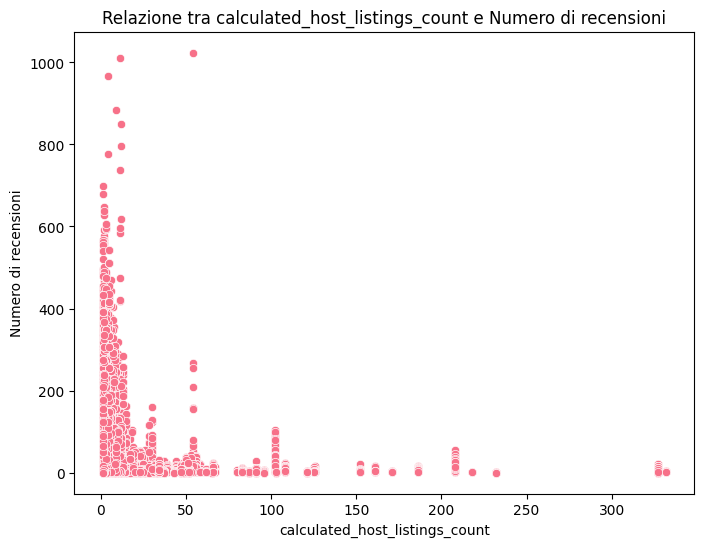

In [293]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='calculated_host_listings_count', y='number_of_reviews')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Numero di recensioni')
plt.title('Relazione tra calculated_host_listings_count e Numero di recensioni')
plt.show()

In [294]:
host_rew=airbnb_df.groupby('calculated_host_listings_count')['number_of_reviews'].max()
host_rew

calculated_host_listings_count
1.0      698.0
2.0      648.0
3.0      607.0
4.0      966.0
5.0      543.0
         ...  
208.0     54.0
218.0      2.0
232.0      2.0
327.0     20.0
332.0      3.0
Name: number_of_reviews, Length: 79, dtype: float64

quidni decudo che gli host che hanno un numero minore di airbnb hanno un numero più elevato di recensioni

In [295]:
calc=airbnb_df.calculated_host_listings_count.value_counts()
calc

calculated_host_listings_count
1.0     63137
2.0     14390
3.0      6546
4.0      3539
5.0      1986
        ...  
22.0       20
86.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 79, dtype: int64

ci sono 63137 host che hano un solo airbnb, 14390 che ne hanno 2 ecc

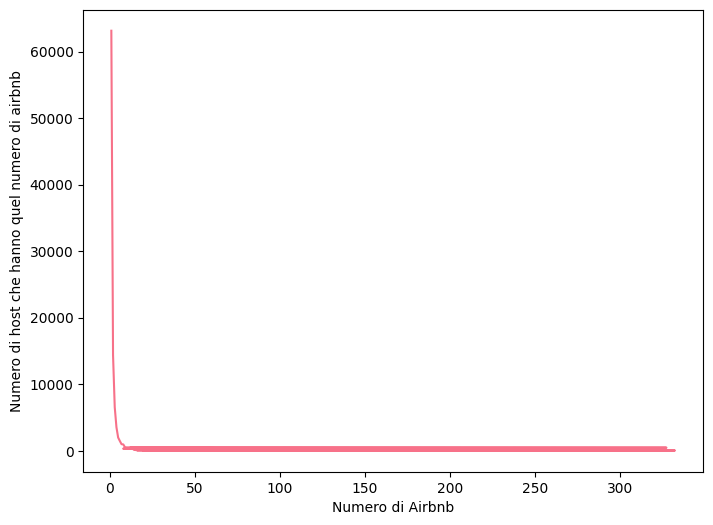

In [296]:
plt.figure(figsize=(8,6))
x = calc.index
y = calc
plt.xlabel('Numero di Airbnb')
plt.ylabel('Numero di host che hanno quel numero di airbnb')
plt.plot(x,y)
plt.show()
#utile???????????????????

la maggior parte degli host ha pochi airbnbs con poche recensioni, ce qualche eccezione che ha tante recensione per i pochi appartamenti e poi ce chi ha piu di 300 appartamenti che ha pochissime recensioni
E UTILE A QUALCOSA????????????? O ELIMINO DALLO SCATTER A QUA CON CALCULATED HOST LISTING COUNT

Now we can see the impact of the service price on the reference room price

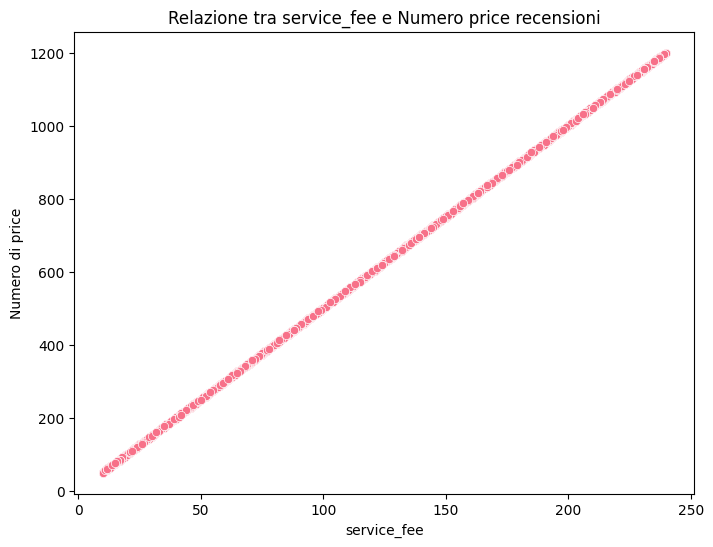

In [297]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='service_fee', y='price')
plt.xlabel('service_fee')
plt.ylabel('Numero di price')
plt.title('Relazione tra service_fee e Numero price recensioni')
plt.show()

they're perfectly correlated so if the price of the airbnb increases, also the service_fee increases.

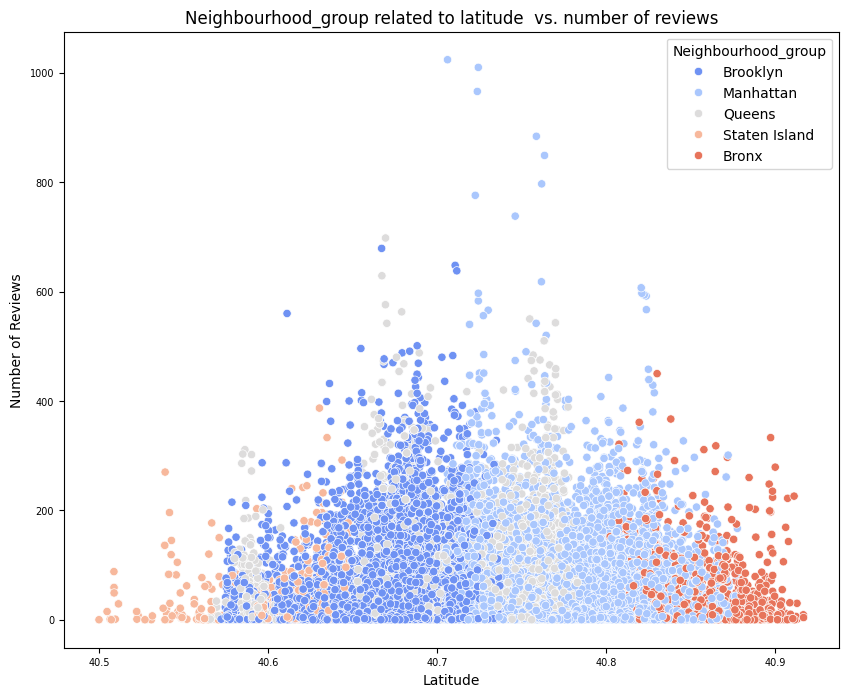

In [298]:
plt.figure(figsize=(10, 8))
plt.xlabel('Latitude')
plt.ylabel('Number of Reviews')
plt.title('Neighbourhood_group related to latitude  vs. number of reviews')
plt.xticks( fontsize=7)
plt.yticks( fontsize=7)
sns.scatterplot(data = airbnb_df, x = 'lat', y= 'number_of_reviews', hue='neighbourhood_group', palette='coolwarm')
plt.legend(title= 'Neighbourhood_group')
plt.show()
#TENGOOO? eliminerei perche secondo me confrontare numero rece e latitudine non mi da info importnati


da questo scatterplot vedo che la maggior parte degli apaprtamenti recensiti si concentra tra gli airbnb con latitudine 40.6 e 40.8

vedo che la maggior parte degli appartamenti recensiti riguardano quelli di brooklyn e manhattan

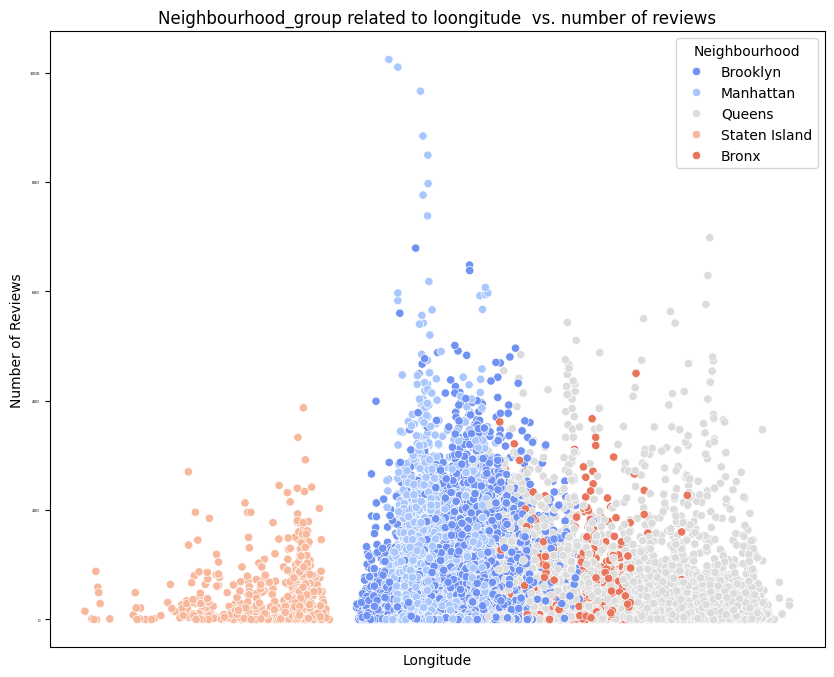

In [299]:
plt.figure(figsize=(10, 8))
plt.xlabel('Longitude')
plt.ylabel('Number of Reviews')
plt.title('Neighbourhood_group related to loongitude  vs. number of reviews')
plt.xticks( fontsize=3)
plt.yticks( fontsize=3)
sns.scatterplot(data = airbnb_df, x = 'long', y= 'number_of_reviews', hue='neighbourhood_group', palette='coolwarm')
plt.legend(title= 'Neighbourhood')
plt.xticks([])
plt.show()
#TENGO???stessa cosa qua

guardo relazione tra price e numer of reviews 

<Figure size 600x400 with 0 Axes>

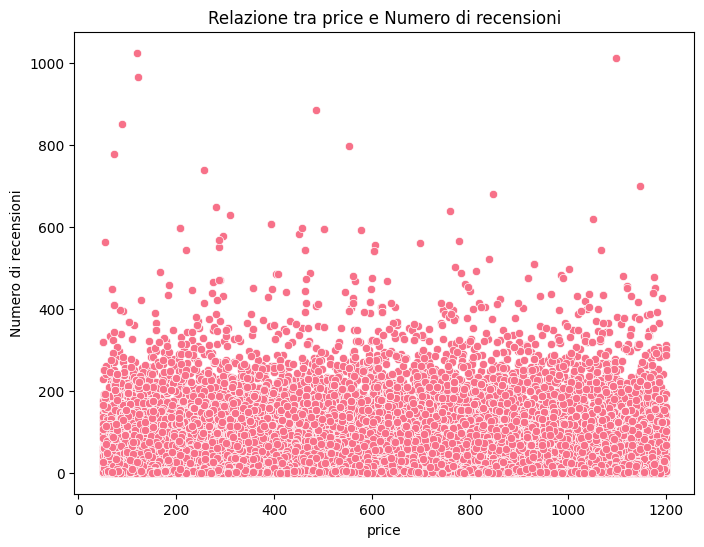

In [300]:
plt.figure(figsize=(6,4))
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='price', y='number_of_reviews')
plt.xlabel('price')
plt.ylabel('Numero di recensioni')
plt.title('Relazione tra price e Numero di recensioni')
plt.show()

vedo che i prezzi giornalieri degli airbnbs non sono influenzati dal numero di recensioni che essi hanno, infatti in questo grafico non osservo nessuna tendenza particolare, inoltre so che il coefficiente di relazione tra 'price' e 'numer_of_reviews' è 0.0052 che indica che sono scorrelati tra loro. quindi potrei ELIMINARLO  e ora provo a fare uno scatterplot tra queste due varibaili per esplorare la loro relazione con il tipo di camera utilizando uno scatter plot con seaborn

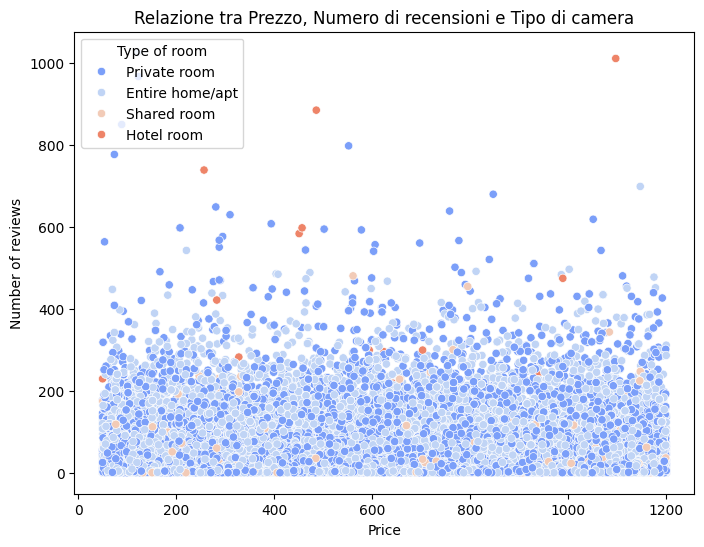

In [301]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=airbnb_df, x='price', y='number_of_reviews', hue='room_type', palette='coolwarm')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Relazione tra Prezzo, Numero di recensioni e Tipo di camera')
plt.legend(title='Type of room', bbox_to_anchor=(0, 1), loc='upper left')
plt.show()
#PENSA SE TENERE O NO IN BASE A SE DOPO FAI QUALCHE PLOT A RIGUARDO

noto che per tutte tipologie di camere il prezzo non è influenzato dal numero di recensioni
e lo stesso vedo che vale anche per service_fee:

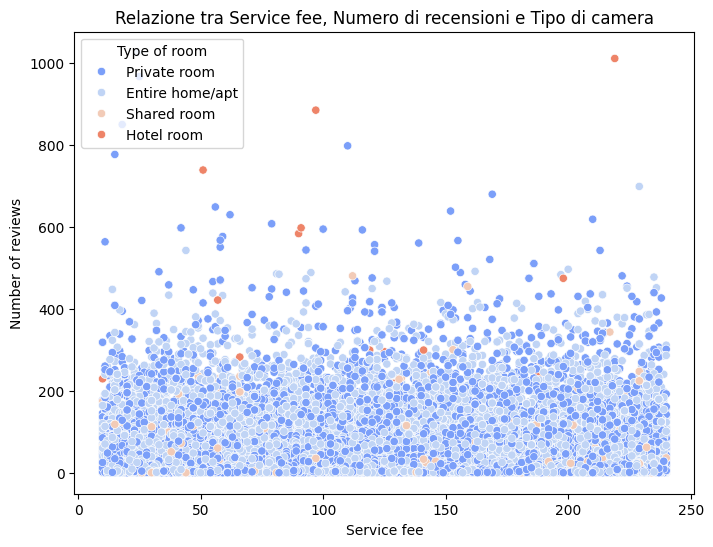

In [302]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=airbnb_df, x='service_fee', y='number_of_reviews', hue='room_type', palette='coolwarm')
plt.xlabel('Service fee')
plt.ylabel('Number of reviews')
plt.title('Relazione tra Service fee, Numero di recensioni e Tipo di camera')
plt.legend(title='Type of room', bbox_to_anchor=(0, 1), loc='upper left')
plt.show()
#PENSA SE TENERE O NO IN BASE A SE DOPO FAI QUALCHE PLOT A RIGUARDO

infatti voglio provare a vedere le correlazioni delle varie tipologie di camere con le altre variabili tra cui price service fee e number of reviews

In [303]:
airbnb_df.room_type.value_counts()
#ELIMINA SE ELIMINI LA CORR SOTTO

room_type
Entire home/apt    53454
Private room       46330
Shared room         2215
Hotel room           114
Name: count, dtype: int64

i valori su cui calcolare le correlaizoni sono questi e faccio:

Text(0.5, 1.0, 'Entire home')

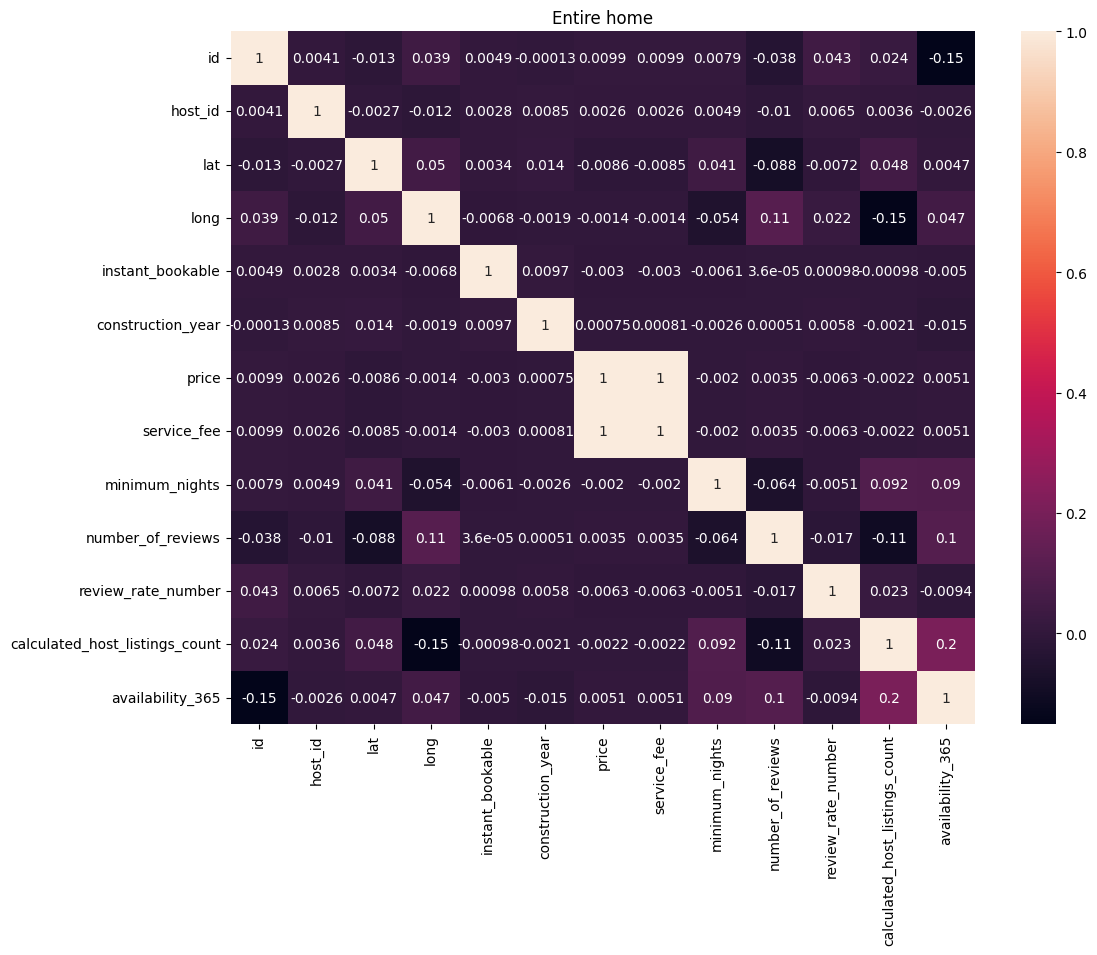

In [304]:
entire_apt = airbnb_df.loc[airbnb_df.room_type == 'Entire home/apt']
correlation_matrix_entire_apt = entire_apt.corr(numeric_only=True)
plt.figure(figsize=(12,9))
plot=sns.heatmap(correlation_matrix_entire_apt, annot=True)
plot.set_title('Entire home')

#ELIMINAAAA NON MI DICE NIENTE DI PIU DI QUELLO CHE GIA SO CHE PRICE E SERVICE FEE COME SEMPRE CONO CORRELATI E GLIA LTRI NO

when we look at this there are price and service free higly positive correlated in the case of an entire apt, perche come visto in precedenza sono due grandeze positivamente correlate, mentre tutti gli altri fattori non scorrelati

avendo cosi tanti valori unici 101572, il grafico scattere non è il modo migliore per visualizzare la relazione tra l'ID e il numero di recensioni, posso provare ad utilzzare un grafico a basse che mostra il numero di recensioni per un certo intervallo di id
#ELIMINA

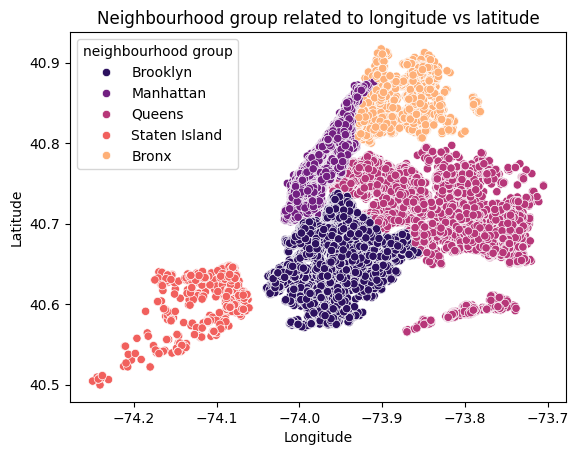

In [305]:
sns.scatterplot(x='long', y='lat', hue='neighbourhood_group',palette='magma', data=airbnb_df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighbourhood group related to longitude vs latitude')
plt.legend(title='neighbourhood group')
plt.show()

In this scatterplot I observe that there are clear differences in the distribution of ounces in the scatterplot among the groups of quarters, it shows that some quarters have a higher concentration of airbnb, such as Manhattan Brooklyn, than others with lower concentration, because they are affected by more parks, green areas and fewer attractions, such as in Staten Island.

Observe whether there is a clear relationship between point size and housing price. For example, you may find that the largest points are actually those with the highest prices, confirming the initial hypothesis

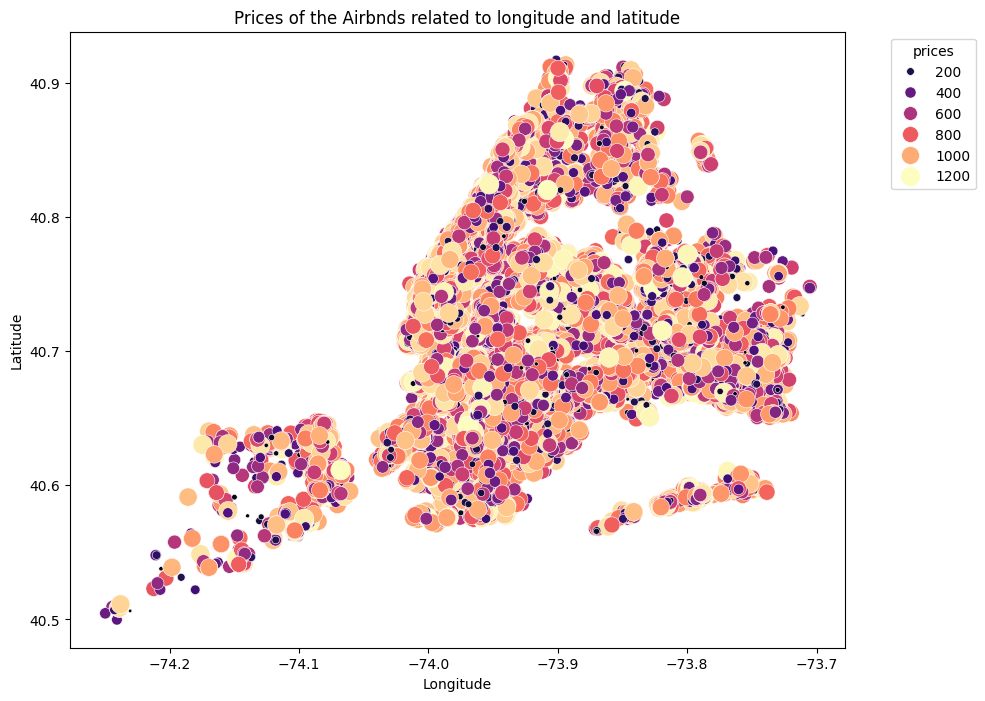

In [306]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', hue='price',  size='price', sizes=(5, 200), data=airbnb_df, palette='magma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Prices of the Airbnds related to longitude and latitude')
plt.legend(title='prices', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

I see that the daily prices of airbnbs are evenly distributed over the various neighboorhood_groups.<br>
points corresponding to more expensive accommodations are represented by larger points

Now I try to study the correlation between two categorical variables: room_type and cancelaltoion_policy using contingency table heatmap

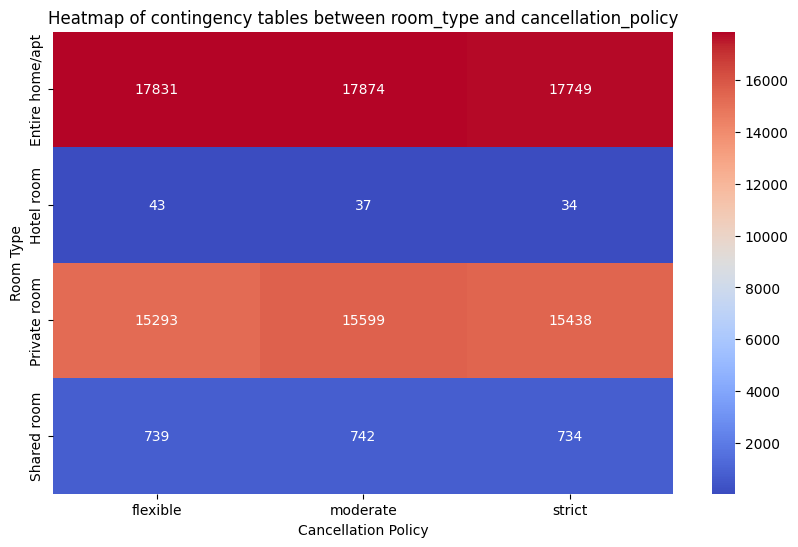

In [307]:
# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df['room_type'], airbnb_df['cancellation_policy'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of contingency tables between room_type and cancellation_policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Room Type')
plt.show()


From the information provided by the heatmap, we can infer that:<br>
- for "entire apt" reservations, more cancellations are available with flexible and moderate policies than strict policies<br>
- for "hotel room" type reservations, cancellations are relatively low and similar among different cancellation policies<br>
- for private room type reservations, cancellations are similar between flexible, moderate and strict policies<br>
- for shared room reservations, cancellations are similar among the different cancellation policies, with a slight difference between flexible and moderate versus strict policies.

I study other relationships between categorical variables: between neighborhood group and room ype to see if there are neighborhoods in which the airbnbs offered are principally in one category:

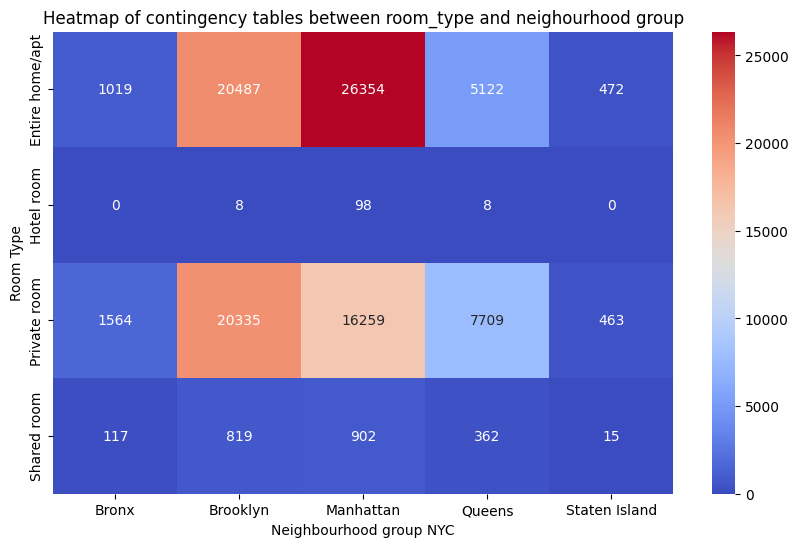

In [308]:
# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df['room_type'], airbnb_df['neighbourhood_group'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of contingency tables between room_type and neighourhood group')
plt.xlabel('Neighbourhood group NYC')
plt.ylabel('Room Type')
plt.show()

From this heatmap I can draw some conclusions::<br>
° It can be seen that the types of apartments offered on Airbnb are differentially distributed in different neighborhoods of New York City. For example, Manhattan seems to have a higher concentration of whole houses and private rooms than other types.<br>
° we can see which type of apartment is more common in each neighborhood. For example, in Manhattan there might be a greater presence of whole houses than other types, while in Staten Island private rooms might be more common.

<br>IN EDAAAA con Proporzione delle tipologie di appartamenti nella città e il subplot

In [309]:
neighborhood_group_counts = airbnb_df.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0) # raggruppo per colonne, con size claoclo la dim di ciascun gruppo risultante, cioè numero di righe e unstack distribuisce i diversi valori in una tabella cosi le righe sono diversi neigh group e colonne room type e 0 riempie eventuali celle vuote
neighborhood_group_counts

room_type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                        
Bronx                           1019           0          1564          117
Brooklyn                       20487           8         20335          819
Manhattan                      26354          98         16259          902
Queens                          5122           8          7709          362
Staten Island                    472           0           463           15

I study other categorical varibles: between neighbourhodds_group and neighbourhood but only between 10 with more airbnbs because there are too many

METTILA PIU FORMALE

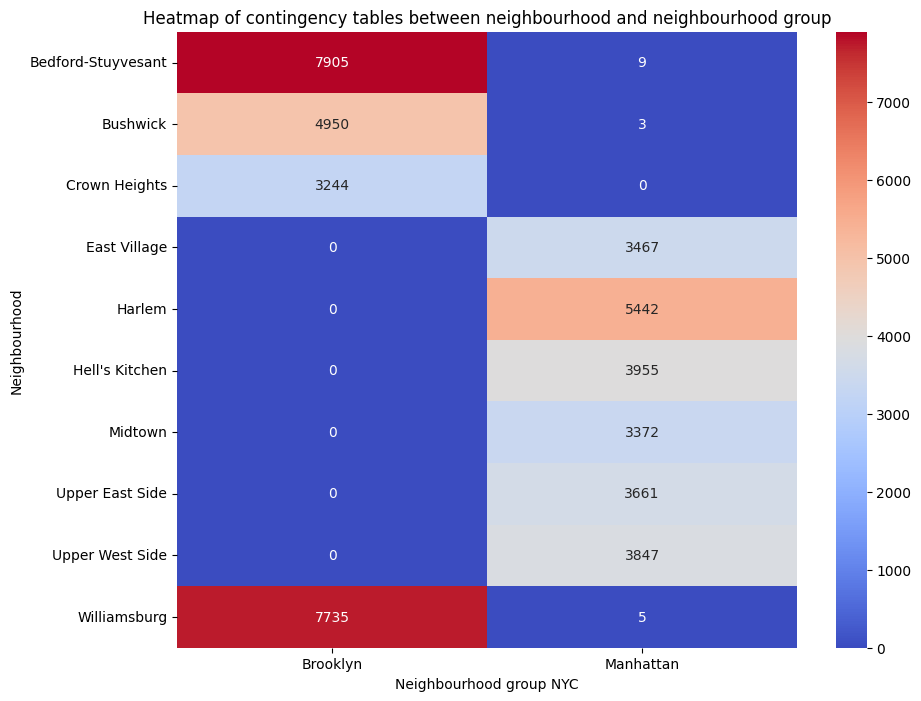

In [310]:
# Calculate the 10 neighbourhoods with the most airbnbs
neighbourhood_by_most_Airbnbs = airbnb_df['neighbourhood'].value_counts()
top_10_neighbourhood = neighbourhood_by_most_Airbnbs.head(10).index

# I use isin to include only the rows corresponding to the top 10 neighbourhoods
airbnb_df_top_10_neighbourhood = airbnb_df[airbnb_df['neighbourhood'].isin(top_10_neighbourhood)]

# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df_top_10_neighbourhood['neighbourhood'], airbnb_df_top_10_neighbourhood['neighbourhood_group'])

# I create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of contingency tables between neighbourhood and neighbourhood group')
plt.xlabel('Neighbourhood group NYC')
plt.ylabel('Neighbourhood')
plt.show()


this heatmap shows only the columns for 'Brooklyn' and 'Manhattan' because the selected top 10 neighborhoods belong only to these two neighborhood_groups. If the top 10 neighborhoods were distributed across all five neighborhood_groups, then the heatmap would also show the columns corresponding to the other neighborhood_groups such as 'Queens', 'Bronx' and 'Staten Island'.

grafico Distribuzione dei quartieri per neighbourhood_group

Now I want to see which quarter groups have the most hosts verifying their identity


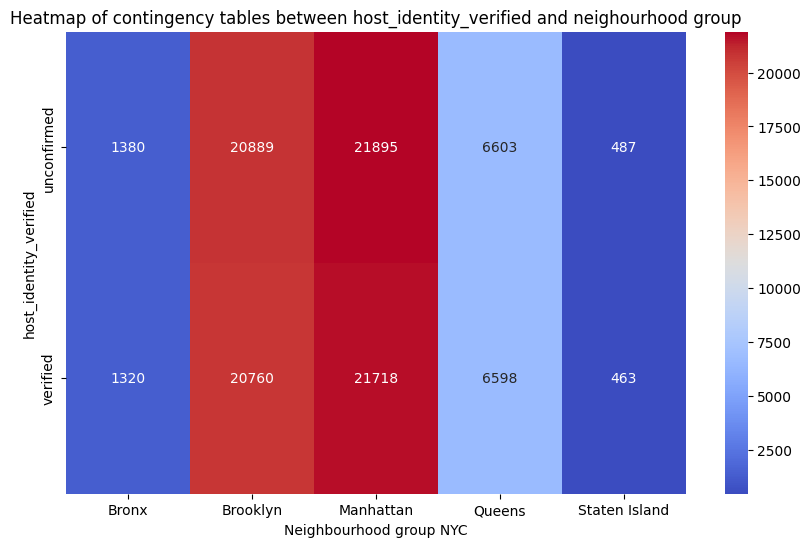

In [311]:
# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df['host_identity_verified'], airbnb_df['neighbourhood_group'])

# I create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of contingency tables between host_identity_verified and neighourhood group')
plt.xlabel('Neighbourhood group NYC')
plt.ylabel('host_identity_verified')
plt.show()

From this heatmap I can draw some conclusions:<br>
We can clearly see that Manhattan and Brooklyn are the neighborhood groups in which the highest number of Airbnb hosts are found, both for verified and unverified hosts. This might indicate a higher popularity of these areas for hosting on Airbnb than the other neighborhood groups.
<br>The Bronx, Queens, and Staten Island neighborhoods have the fewest airbnbs, as seen above.
<br>
It might be interesting to further examine how identity verification affects guest reviews.

qua i due plot tra cui devo decideere con Distribuzione delle Recensioni per Identità Verificata

# EDA

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'construction_year'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'service_fee'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'review_rate_number'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

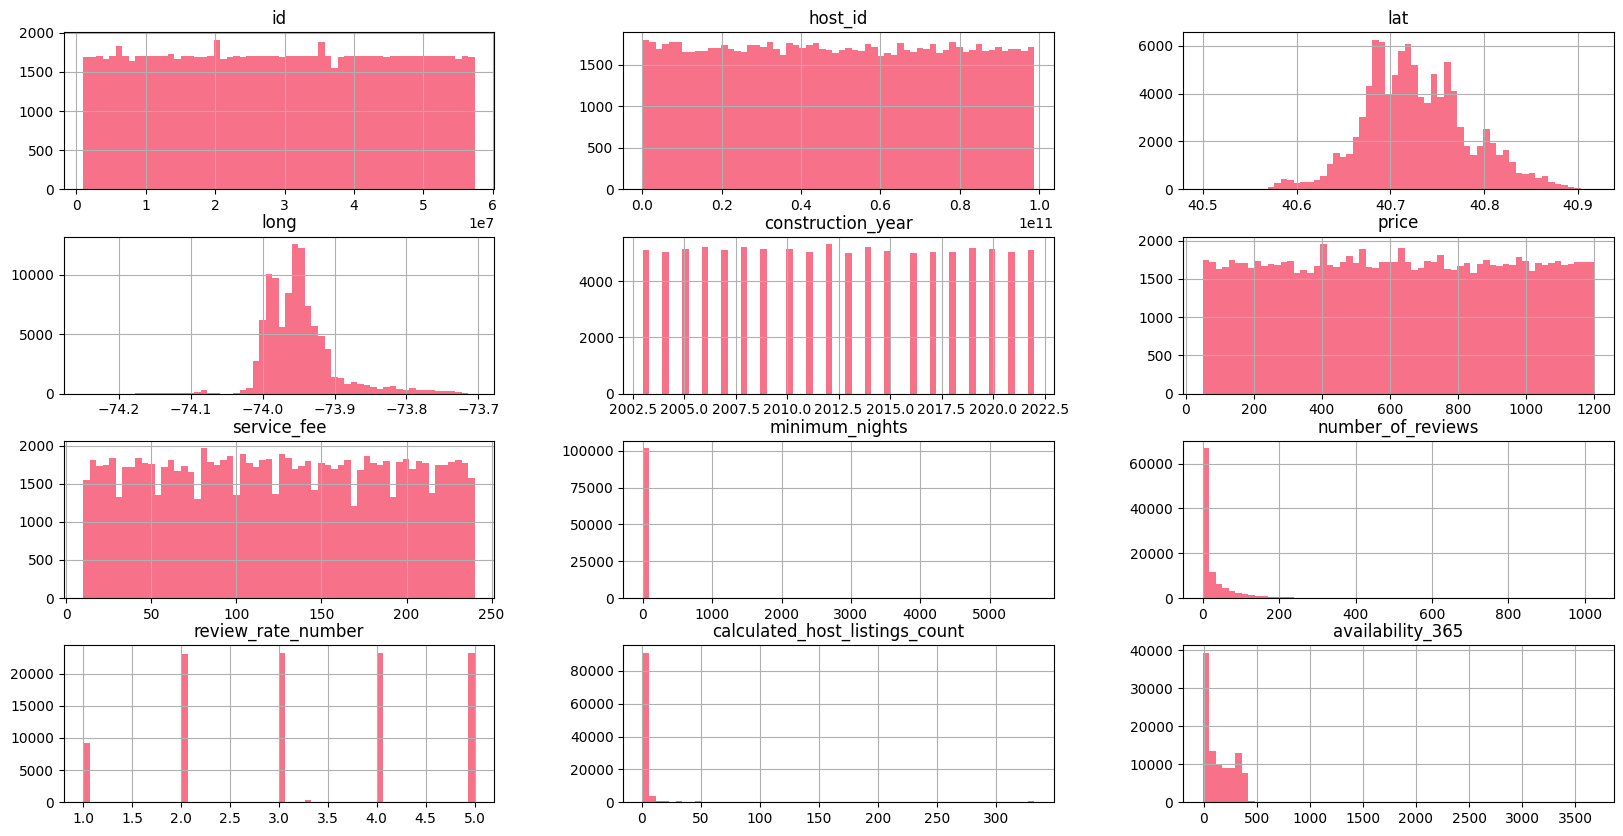

In [312]:
airbnb_df.hist(bins=60, figsize=(20,10))
#TENGO????

Text(0.5, 1.0, 'Neighbourhood_group locations ')

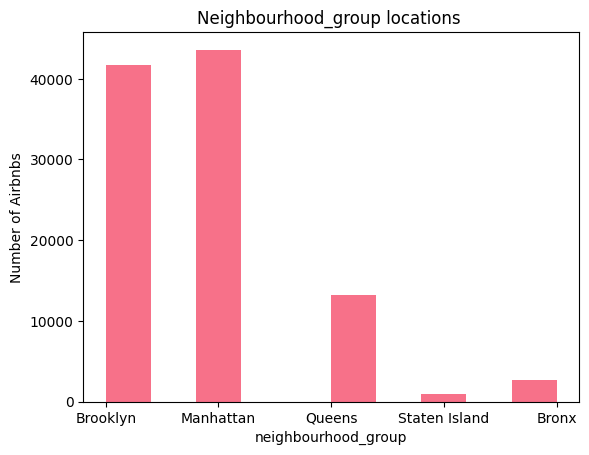

In [313]:
plt.hist(airbnb_df['neighbourhood_group'])
plt.xlabel('neighbourhood_group')
plt.ylabel('Number of Airbnbs')
plt.title('Neighbourhood_group locations ')

10 neighbourood with most airbnbs:

In [314]:
neighbourhood_by_most_Airbnbs = airbnb_df.neighbourhood.value_counts()
top_10_neighbourhood = neighbourhood_by_most_Airbnbs.head(10)
top_10_neighbourhood

neighbourhood
Bedford-Stuyvesant    7914
Williamsburg          7740
Harlem                5442
Bushwick              4953
Hell's Kitchen        3955
Upper West Side       3847
Upper East Side       3661
East Village          3467
Midtown               3372
Crown Heights         3244
Name: count, dtype: int64

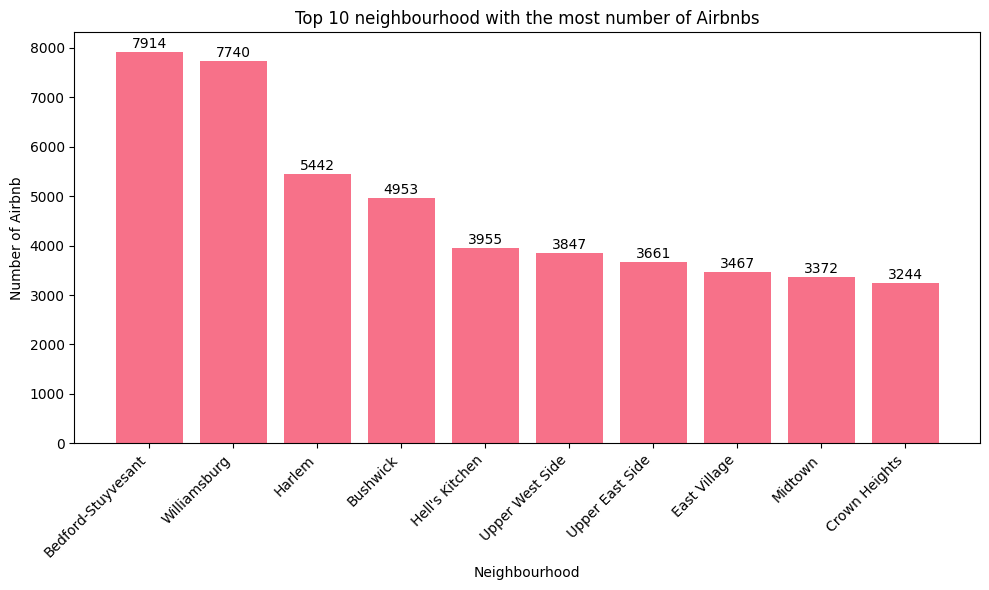

In [315]:
plt.figure(figsize=(10,6))
x = top_10_neighbourhood.index 
y = top_10_neighbourhood # Number of neighbourhoods
plt.title('Top 10 neighbourhood with the most number of Airbnbs')
plt.bar(x, y)
plt.xticks(rotation=45, ha='right') #with 'right' I'm sure that the xticks are under the corresponding bar
plt.ylabel('Number of Airbnb')
plt.xlabel('Neighbourhood')
for i, v in enumerate(y):#i index of y, v is the number of airbnbs in the neighbourhood of index i
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


now i want to know which is the year dove sono stat costruiti più aribnbs:

In [316]:
years=airbnb_df.construction_year.value_counts()
years

construction_year
2012    5309
2014    5213
2008    5200
2006    5196
2019    5174
2009    5144
2020    5136
2010    5135
2005    5116
2022    5112
2003    5097
2007    5086
2015    5074
2017    5042
2011    5041
2018    5030
2021    5015
2004    5010
2013    4993
2016    4990
Name: count, dtype: int64

Construction years range from 2003 to 2022, and the largest number of airbnbs were built in 2012, as can also be seen in:

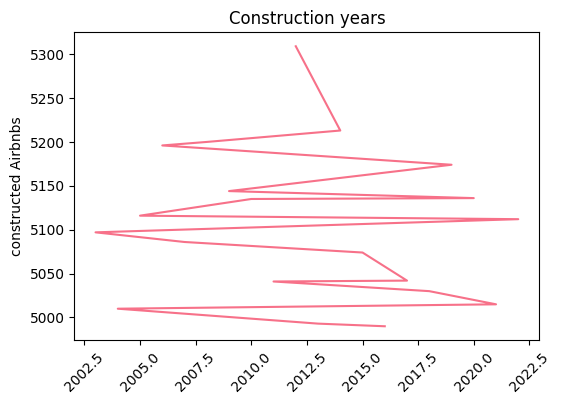

In [317]:
plt.figure(figsize=(6,4))
x=years.index
y=years
plt.plot(x,y)
plt.title('Construction years')
plt.xticks(rotation=45)
plt.ylabel('constructed Airbnbs')
plt.show()


I want to know what year the most expensive airbnb is. To do this I group the data by year of construction and for each I find the maximum price:

In [318]:
max_price_per_year= airbnb_df.groupby('construction_year')['price'].max()
max_price_per_year

construction_year
2003    1200.0
2004    1199.0
2005    1200.0
2006    1199.0
2007    1200.0
2008    1200.0
2009    1200.0
2010    1200.0
2011    1200.0
2012    1200.0
2013    1200.0
2014    1200.0
2015    1200.0
2016    1200.0
2017    1200.0
2018    1200.0
2019    1200.0
2020    1200.0
2021    1200.0
2022    1200.0
Name: price, dtype: float64

the maximum daily price of an airbnb built in 2004 and 2006 is $1199, while for those built in other years it is $1,200

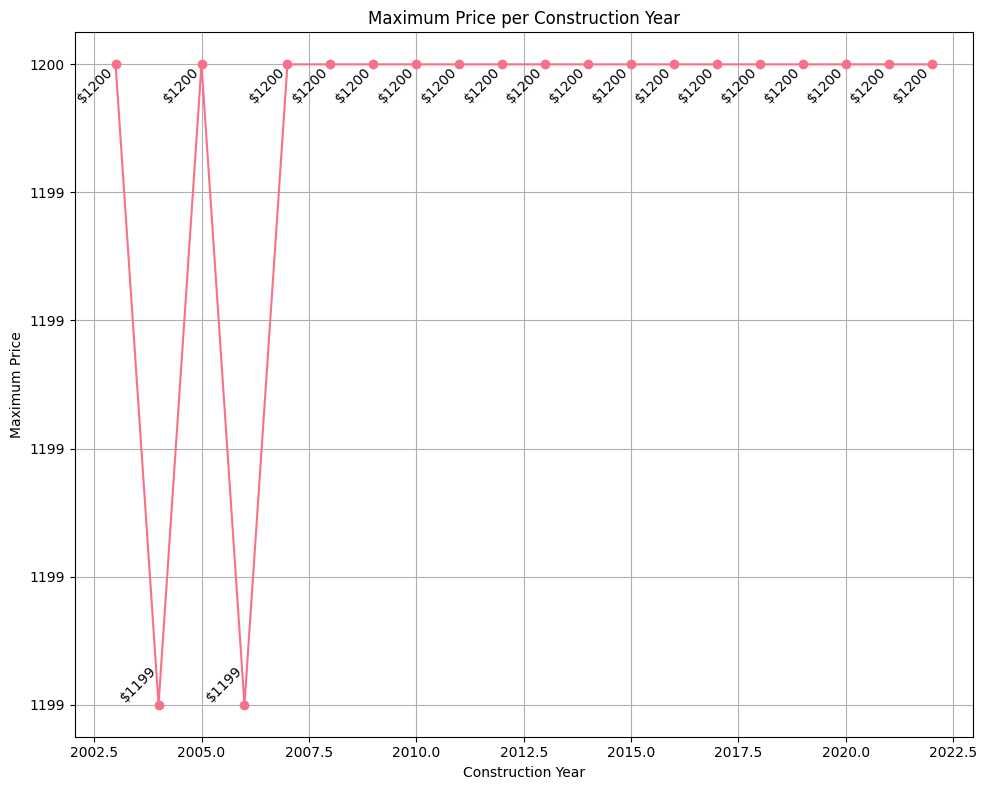

In [319]:
max_price_per_year.plot(kind='line', figsize=(10, 8), marker='o')
plt.xlabel('Construction Year')
plt.ylabel('Maximum Price')
plt.title('Maximum Price per Construction Year')
plt.grid(True)

# Adding price tags to markers
for year, price in max_price_per_year.items():
    # Place labels over markers for prices greater than 1199 for better readability
    if price > 1199:
        plt.text(year, price, f'${price:.0f}', rotation=45, ha='right', va='top')
    # Place labels under the markers for other prices
    else:
        plt.text(year, price, f'${price:.0f}', rotation=45, ha='right', va='bottom')

# Formatting the y-axes as integers, otherwise they result in decimals such as 0.0+1.2e3 = 1200
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.tight_layout() 
plt.show()


meglio tenere questo sopra rispettoa quello sotto per i valori su asse y, pero intanto non lo cancello ancora

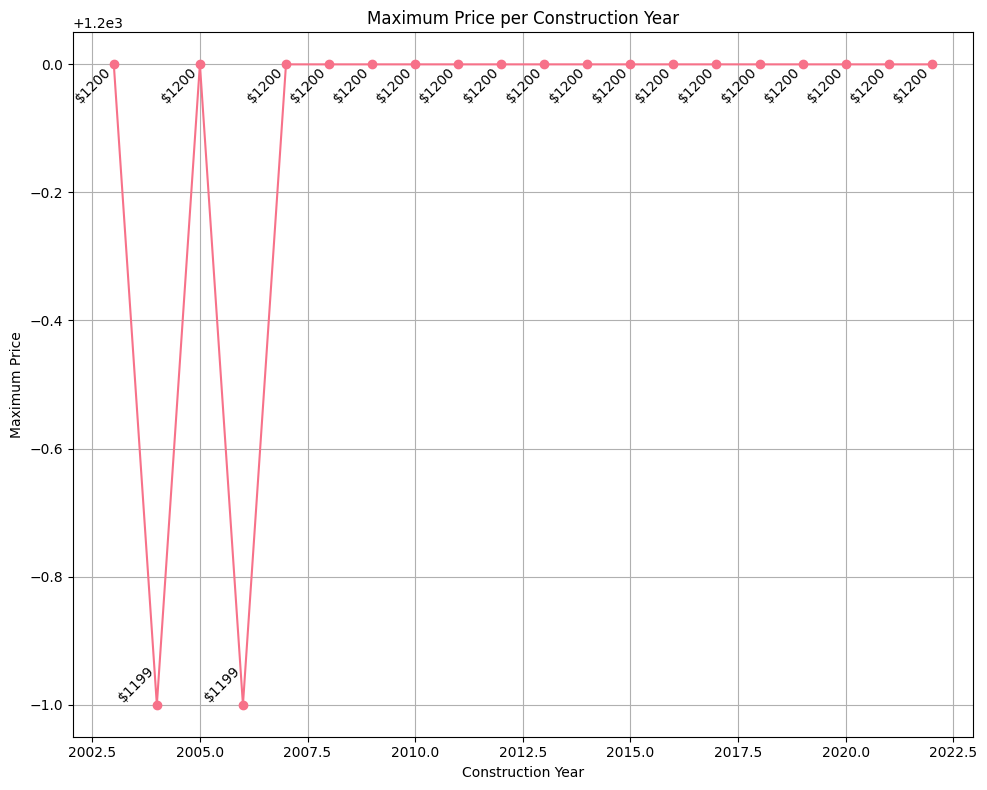

In [320]:
max_price_per_year.plot(kind='line', figsize=(10, 8), marker='o')
plt.xlabel('Construction Year')
plt.ylabel('Maximum Price')
plt.title('Maximum Price per Construction Year')
plt.grid(True)

# Adding price tags to markers
for year, price in max_price_per_year.items():
    # Place labels over markers for prices greater than 1199 for better readability
    if price > 1199:
        plt.text(year, price, f'${price:.0f}', rotation=45, ha='right', va='top')
    # Place labels under the markers for other prices
    else:
        plt.text(year, price, f'${price:.0f}', rotation=45, ha='right', va='bottom')

plt.tight_layout() 
plt.show()
#ELIMINA PERCHE SORPA CE QUELLO CON ASSE Y SISTEMATA

I want to know what year the less expensive airbnb is. To do this I group the data by year of construction and for each I find the minimum price:

In [321]:
min_price_per_year= airbnb_df.groupby('construction_year')['price'].min()
min_price_per_year

construction_year
2003    50.0
2004    50.0
2005    50.0
2006    50.0
2007    50.0
2008    50.0
2009    50.0
2010    50.0
2011    50.0
2012    50.0
2013    50.0
2014    50.0
2015    50.0
2016    50.0
2017    50.0
2018    50.0
2019    50.0
2020    50.0
2021    50.0
2022    50.0
Name: price, dtype: float64

the minimum daily price of each apartment built is $50, regardless of the year of construction

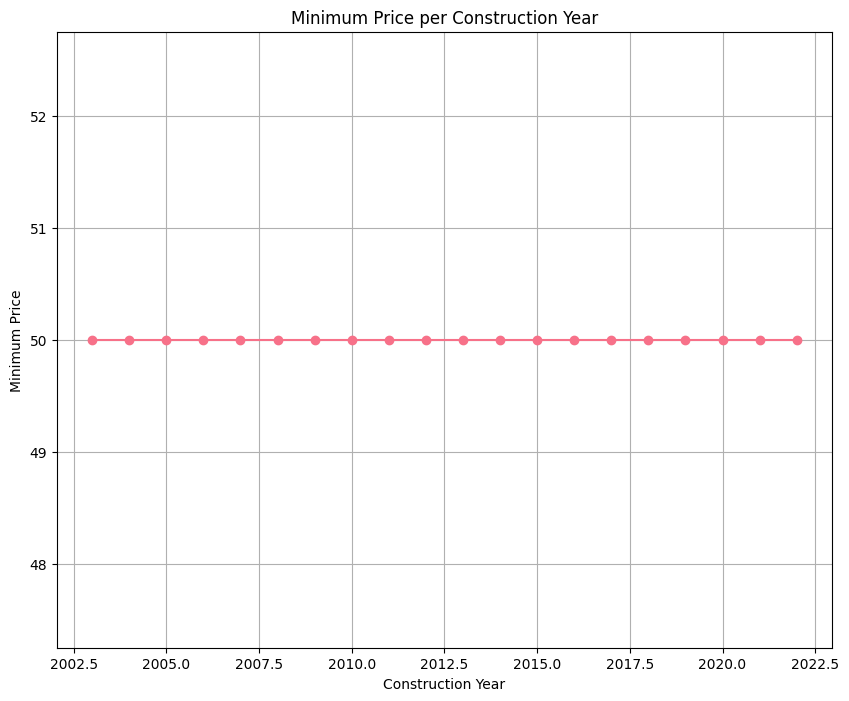

In [322]:
min_price_per_year.plot(kind='line', figsize=(10, 8), marker='o')
plt.xlabel('Construction Year')
plt.ylabel('Minimum Price')
plt.title('Minimum Price per Construction Year')
plt.grid(True)
plt.show()

potrei mettere quei due graifci in un subplot per vedere insieme

The difference between room types in the number of apartments with that type of cancellation for each calcollation policy varies and depends on the number of rooms in that type. I create a bar plot showing the number of cancellations for each room type (entire apt, hotel room, private room, shared room) broken down by cancellation policy (flexible, moderate, strict):

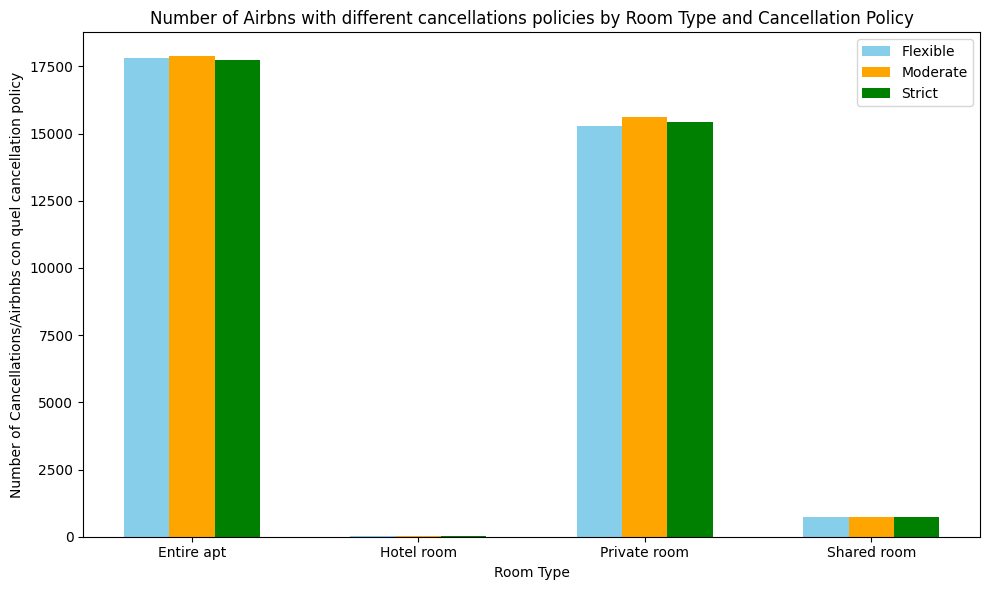

In [323]:
# Data
room_types = ['Entire apt', 'Hotel room', 'Private room', 'Shared room']
flexible_counts = [17831, 43, 15293, 739]
moderate_counts = [17874, 37, 15599, 742]
strict_counts = [17749, 34, 15438, 734]

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(room_types))# where len(room_types) I know is 4 and so idex will be 0,1,2,3 on the x-axis where to place the bars with the types of airbnbs

plt.bar(index, flexible_counts, bar_width, label='Flexible', color='skyblue')
plt.bar([i + bar_width for i in index], moderate_counts, bar_width, label='Moderate', color='orange') # With [i + bar_width for i in index], each bar will be moved to the right of bar_width from its original position, allowing the bars to be attached to each other without spaces.
plt.bar([i + 2 * bar_width for i in index], strict_counts, bar_width, label='Strict', color='green')

plt.xlabel('Room Type')
plt.ylabel('Number of Cancellations/Airbnbs con quel cancellation policy') #sistema (tieni la seconda)
plt.title('Number of Airbns with different cancellations policies by Room Type and Cancellation Policy')
plt.xticks([i + bar_width for i in index], room_types)
plt.legend()
plt.tight_layout()
plt.show()

Now I want to make a plot to depict the proportion of the various types of apartments in New York City


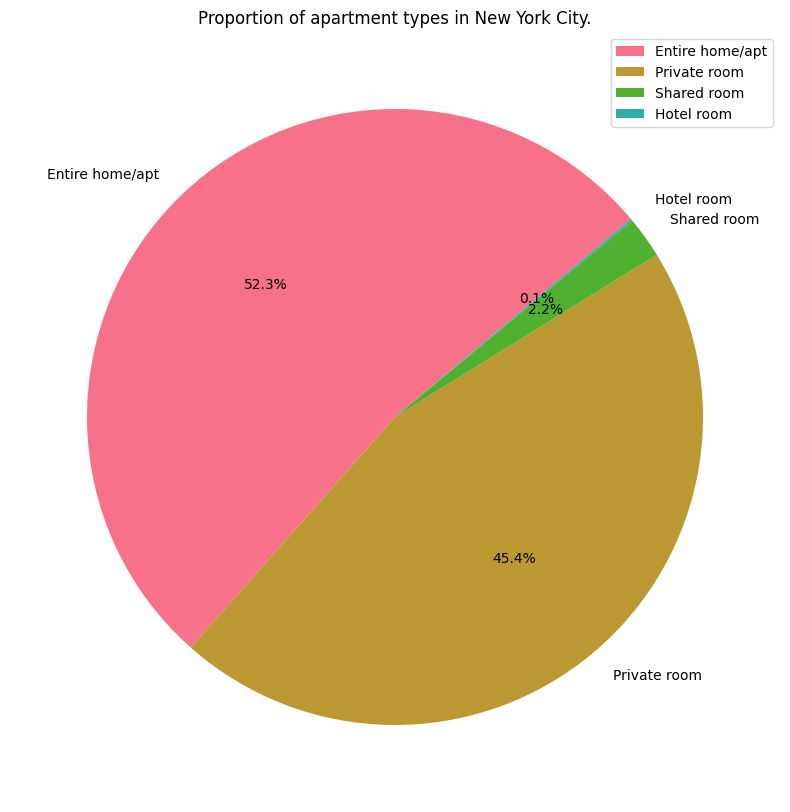

In [324]:
# Calculate the total for each type of apartment
total_counts = airbnb_df['room_type'].value_counts()

# Create the pie chart
plt.figure(figsize=(12,10))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=40)
plt.title('Proportion of apartment types in New York City.')
plt.legend()
plt.show()

And now I do the plot to see for each neighborhood group what are the types of airbnbs in the listing

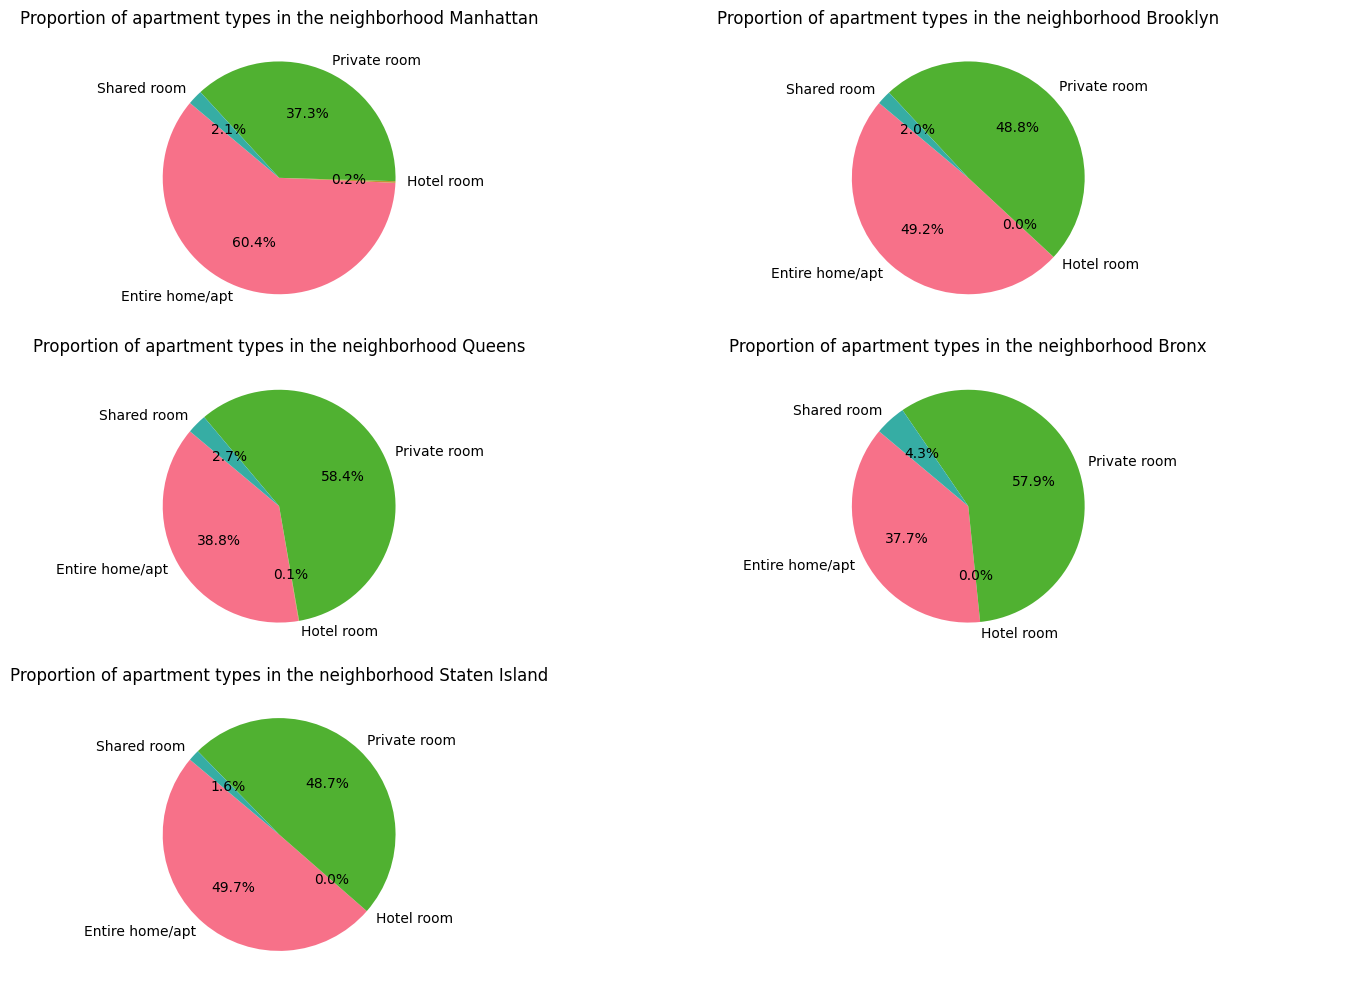

In [325]:
num_rows = 3
num_columns = 2

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
neighborhood_group_counts = airbnb_df.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0) # group by columns, with size I calculate the size of each resulting group, i.e. number of rows and unstack distributes the different values in a table so rows are different neigh group and columns room type and 0 fills any empty cells


# 1st plot
axes[0, 0].pie(neighborhood_group_counts.loc['Manhattan'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title(f'Proportion of apartment types in the neighborhood Manhattan')

# 2nd plot
axes[0, 1].pie(neighborhood_group_counts.loc['Brooklyn'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title(f'Proportion of apartment types in the neighborhood Brooklyn')

# 3rd plot
axes[1, 0].pie(neighborhood_group_counts.loc['Queens'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title(f'Proportion of apartment types in the neighborhood Queens')

# 4th plot
axes[1, 1].pie(neighborhood_group_counts.loc['Bronx'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title(f'Proportion of apartment types in the neighborhood Bronx')

# 5th plot
axes[2, 0].pie(neighborhood_group_counts.loc['Staten Island'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[2, 0].set_title(f'Proportion of apartment types in the neighborhood Staten Island')

# Eliminate the last excess axes
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


Plot of distribution in neighborhood groups in the 10 New York City neighborhoods with the most aribnbs:

In [326]:
# Calculate the 10 neighbourhoods with the most airbnbs
neighbourhood_by_most_Airbnbs = airbnb_df['neighbourhood'].value_counts()
top_10_neighbourhood = neighbourhood_by_most_Airbnbs.head(10).index

# I use isin to include only the rows corresponding to the top 10 neighbourhoods
airbnb_df_top_10_neighbourhood = airbnb_df[airbnb_df['neighbourhood'].isin(top_10_neighbourhood)]

<Figure size 600x400 with 0 Axes>

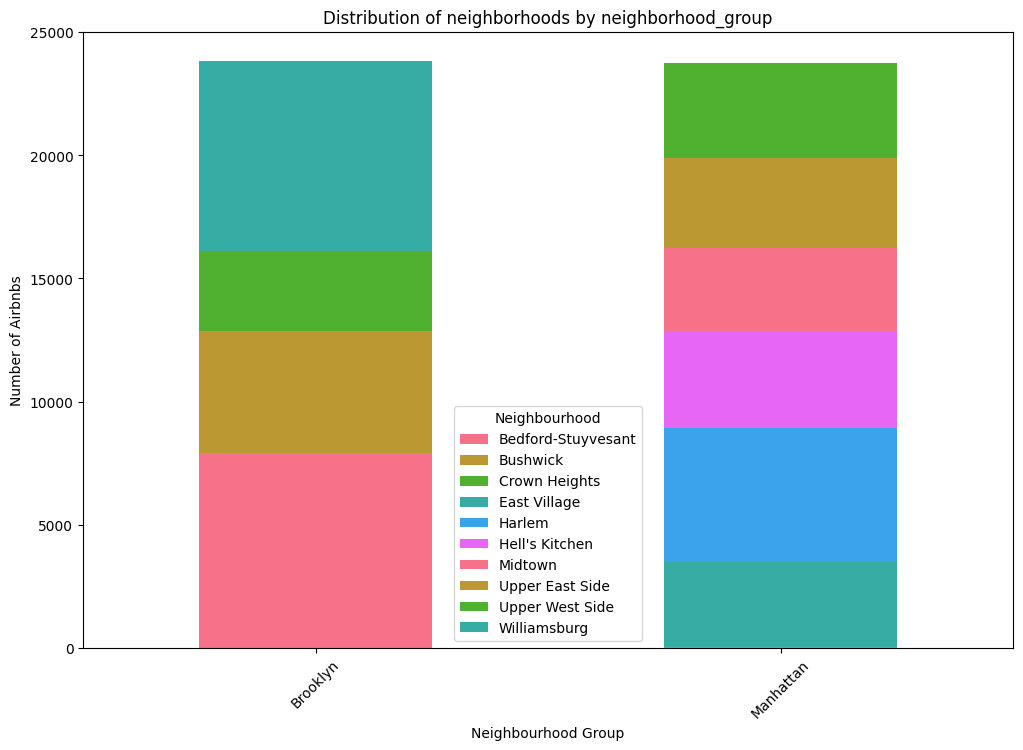

In [327]:
plt.figure(figsize=(6,4))
# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df_top_10_neighbourhood['neighbourhood_group'], airbnb_df_top_10_neighbourhood['neighbourhood']) # different than the previous one because now I want on the x-axis neighbourhood group

# Create the stacked bar graph
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of neighborhoods by neighborhood_group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Airbnbs')
plt.xticks(rotation=45)  # I rotate the labels on the x-axis for better readability
plt.legend(title='Neighbourhood')
plt.show()

I see that Brooklyn has fewer neighborhoods but each of them has a high number of Airbnbs, while Manhattan has more neighborhoods but fewer Airbnbs.

In [328]:
reviews_counts = airbnb_df.groupby(['host_identity_verified', 'review_rate_number']).size().unstack(fill_value=0)
reviews_counts

review_rate_number      1.000000  2.000000  3.000000  3.279106  4.000000  \
host_identity_verified                                                     
unconfirmed                 4680     11535     11663       185     11637   
verified                    4482     11454     11504       141     11575   

review_rate_number      5.000000  
host_identity_verified            
unconfirmed                11554  
verified                   11703

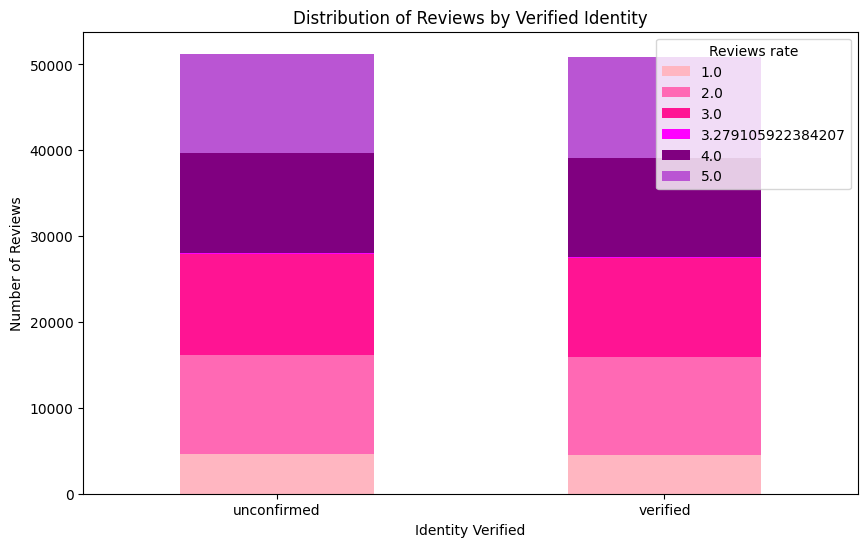

In [329]:
# Definisci la palette di colori
palette = ['#FFB6C1', '#FF69B4', '#FF1493', '#FF00FF', '#800080', '#BA55D3']

# Plot
reviews_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette) # I put stacked to stack the data in the bar graph
plt.xlabel('Identity Verified')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Verified Identity')
plt.legend(title='Reviews rate')
plt.xticks(rotation=0)  # To avoid the rotation of labels on the x-axis
plt.show()

oppure questo, decidi quale dei due tenere

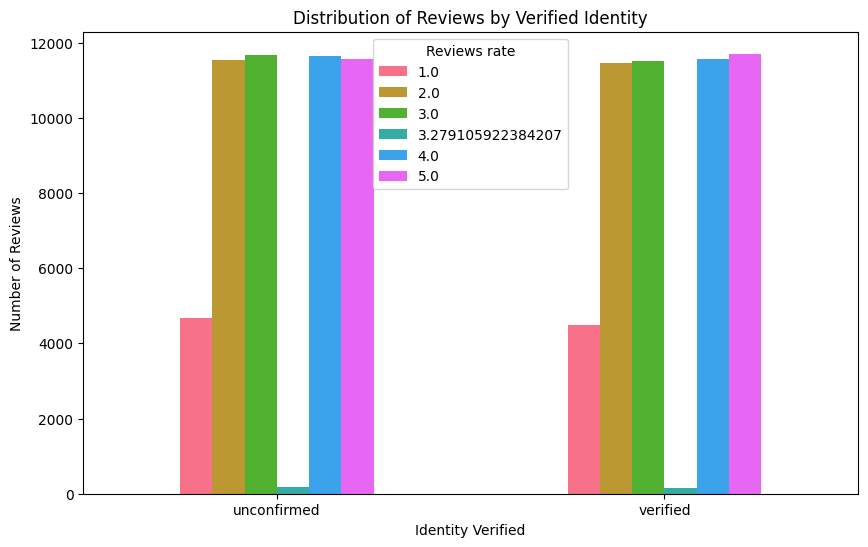

In [330]:
# Plot
reviews_counts.plot(kind='bar',  figsize=(10, 6)) # I put stacked to stack the data in the bar graph
plt.xlabel('Identity Verified')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Verified Identity')
plt.legend(title='Reviews rate')
plt.xticks(rotation=0)  # To avoid the rotation of labels on the x-axis
plt.show()

I observe that the number of reviews with each score is similar between verified and unverified hosts, it might indicate that the identity verification status is not a determining factor in guests' overall evaluation, while other factors, such as may be cleanliness, comfort, location, and hospitality, are more influential, or there is a lack of awareness of host idnentity confirmation by guests.

Now I calculate the highest price for neighborhood and then the lowest price with their cordinates and then create a map of New York City to visualize where they are located.

In [331]:
airbnb_df.groupby('neighbourhood')['price'].max()
#LO ELIMINO PERCHE L HO MESSO NEL PLOT SOTTO CHIAMANDOLO max_rime_per _neighbourhod

neighbourhood
Allerton           1195.0
Arden Heights      1136.0
Arrochar           1196.0
Arverne            1197.0
Astoria            1200.0
                    ...  
Windsor Terrace    1194.0
Woodhaven          1199.0
Woodlawn           1121.0
Woodrow            1025.0
Woodside           1200.0
Name: price, Length: 224, dtype: float64

I use the .agg() method found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html <br>to aggregate according to long and lat

In [332]:
# I find the latitude and longitude of each neighborhood
neighborhood_coordinates = airbnb_df.groupby('neighbourhood').agg({'lat': 'mean', 'long': 'mean'})

# I find the maximum price for each neighborhood
max_price_per_neighborhood = airbnb_df.groupby('neighbourhood')['price'].max()

# I find the highest price overall among all neighborhoods
max_price = max_price_per_neighborhood.max()

# I find the neighborhoods where you have the highest price
most_expensive_neighborhoods = max_price_per_neighborhood[max_price_per_neighborhood == max_price].index.tolist()

# Print neighborhoods with maximum price, relative maximum price, latitude and longitude
print("The neighborhoods with the highest price are.:")
for neighborhood in most_expensive_neighborhoods:
    lat = neighborhood_coordinates.loc[neighborhood, 'lat']
    long = neighborhood_coordinates.loc[neighborhood, 'long']
    print(f"Neighbourhood: {neighborhood}, \t\t\tLatitude: {lat}, Longitude: {long}")

# Print the total number of neighborhoods in the DataFrame
total_neighborhoods = airbnb_df['neighbourhood'].nunique()
print("\n\nTotal number of neighborhoods in the DataFrame:", total_neighborhoods)
print(f'Maximum price: {max_price}')

# print the number of quarters with the maximum price
num_most_expensive_neighborhoods = len(most_expensive_neighborhoods)
print("Number of neighborhoods with the maximum price:", num_most_expensive_neighborhoods)


The neighborhoods with the highest price are.:
Neighbourhood: Astoria, 			Latitude: 40.76438361546867, Longitude: -73.92027622745046
Neighbourhood: Bedford-Stuyvesant, 			Latitude: 40.68724061017817, Longitude: -73.93956036663255
Neighbourhood: Belmont, 			Latitude: 40.854824471363635, Longitude: -73.887575805
Neighbourhood: Boerum Hill, 			Latitude: 40.68639942415731, Longitude: -73.9853891011236
Neighbourhood: Bushwick, 			Latitude: 40.696422124853626, Longitude: -73.9201815525843
Neighbourhood: Chelsea, 			Latitude: 40.74491212493181, Longitude: -73.99784252591289
Neighbourhood: City Island, 			Latitude: 40.84807195121952, Longitude: -73.78705268292683
Neighbourhood: Crown Heights, 			Latitude: 40.67276378046251, Longitude: -73.94548116302585
Neighbourhood: Ditmars Steinway, 			Latitude: 40.77490740036496, Longitude: -73.91083507566422
Neighbourhood: East Flatbush, 			Latitude: 40.648745106979256, Longitude: -73.93907689097925
Neighbourhood: East New York, 			Latitude: 40.6682311932

In [333]:
# I find the latitude and longitude of each neighborhood
neighborhood_coordinates1 = airbnb_df.groupby('neighbourhood').agg({'lat': 'mean', 'long': 'mean'}) #aggrego i dati raggruppandoli in quartire e calcolando al media della latitudine e longitudine di ciascun quartire per ottenere un'unica coppia di coordinate per ciascun quartiere

# I find the minimum price for each neighborhood
min_price_per_neighborhood = airbnb_df.groupby('neighbourhood')['price'].min()

# I find the lowest price in general among all neighborhoods
min_price = min_price_per_neighborhood.min()

# I find the neighborhoods where you have the lowest price
less_expensive_neighborhoods = min_price_per_neighborhood[min_price_per_neighborhood == min_price].index.tolist()

# Print neighborhoods with minimum price, relative minimum price, latitude and longitude
print("The neighborhoods with the lowest price are.:")
for neighborhood in less_expensive_neighborhoods:
    lat = neighborhood_coordinates1.loc[neighborhood, 'lat']
    long = neighborhood_coordinates1.loc[neighborhood, 'long']
    print(f"Neighbourhood: {neighborhood}, \t\t\tLatitude: {lat}, Longitude: {long}")

# Print the total number of neighborhoods in the DataFrame
total_neighborhoods = airbnb_df['neighbourhood'].nunique()
print("\n\nTotal number of neighborhoods in the DataFrame:", total_neighborhoods)
print("Minimum price:", min_price)

# Print the number of neighborhoods with the minimum price
num_less_expensive_neighborhoods = len(less_expensive_neighborhoods)
print("Number of neighborhoods with the lowest price:", num_less_expensive_neighborhoods)

The neighborhoods with the lowest price are.:
Neighbourhood: Astoria, 			Latitude: 40.76438361546867, Longitude: -73.92027622745046
Neighbourhood: Bedford-Stuyvesant, 			Latitude: 40.68724061017817, Longitude: -73.93956036663255
Neighbourhood: Borough Park, 			Latitude: 40.63735557518797, Longitude: -73.99719103759398
Neighbourhood: Bushwick, 			Latitude: 40.696422124853626, Longitude: -73.9201815525843
Neighbourhood: Canarsie, 			Latitude: 40.63885512718204, Longitude: -73.90158159102245
Neighbourhood: Crown Heights, 			Latitude: 40.67276378046251, Longitude: -73.94548116302585
Neighbourhood: Cypress Hills, 			Latitude: 40.68225271934132, Longitude: -73.88367905859282
Neighbourhood: Ditmars Steinway, 			Latitude: 40.77490740036496, Longitude: -73.91083507566422
Neighbourhood: East Elmhurst, 			Latitude: 40.762931203078516, Longitude: -73.87795916605371
Neighbourhood: East Harlem, 			Latitude: 40.79633508073883, Longitude: -73.94225887286082
Neighbourhood: East Village, 			Latitude: 40

Now I create the map where green markers indicate the least expensive airbnbs and red markers indicate the most expensive airbnbs and their price per day.
<br>Resources used: <br>
- I use the folium library:https://www.andreaprovino.it/folium-geospatial-data-python <br> 
- https://youtu.be/SgacOaHoJLs?si=vJ5hJFD5QxGkGEyv how to create the basemap 

In [334]:
#I create the basemap
map_nyc = folium.Map(location = [40.76438361546867, -73.92027622745046], zoom_start = 10)
# map_nyc = folium.Map(location = [40.76438361546867, -73.92027622745046], zoom_start = 8, tiles = "CartoDB Positron")

# Iterate on each neighborhood and create a marker on the map for each expensive neighborhood
for neighborhood in most_expensive_neighborhoods:
    # I find the latitude and longitude of the neighborhood
    lat = neighborhood_coordinates.loc[neighborhood, 'lat'] # neighborhood_coordinates l'ho definito nel codice sopra con groupy tra neighbourhood e .agg(lat e long medie)
    long = neighborhood_coordinates.loc[neighborhood, 'long']
    
    # I add a marker with the price of the neighborhood
    folium.Marker([lat, long], popup=neighborhood, tooltip = 'price: $1200', icon = folium.Icon(color = 'red', icon = 'house', prefix = 'fa')).add_to(map_nyc)

# Iterate on each neighborhood and create a marker on the map for each least expensive neighborhood
for neighborhood in less_expensive_neighborhoods:
    # I find the latitude and longitude of the neighborhood
    lat = neighborhood_coordinates1.loc[neighborhood, 'lat'] # neighborhood_coordinates1 l'ho definito nel codice sopra con groupy tra neighbourhood e .agg(lat e long medie)
    long = neighborhood_coordinates1.loc[neighborhood, 'long']
    
    # I add a marker with the price of the neighborhood
    folium.Marker([lat, long], popup=neighborhood, tooltip = 'price: $50', icon = folium.Icon(color = 'green', icon = 'house', prefix = 'fa')).add_to(map_nyc)
map_nyc

Find the neighbourhood that host the best rate reviews on average

In [335]:
average_review_rate = airbnb_df.groupby('neighbourhood')['review_rate_number'].mean()
average_review_rate

neighbourhood
Allerton           3.273741
Arden Heights      3.777778
Arrochar           3.476061
Arverne            3.228700
Astoria            3.226243
                     ...   
Windsor Terrace    3.107231
Woodhaven          3.321053
Woodlawn           3.310345
Woodrow            4.000000
Woodside           3.405810
Name: review_rate_number, Length: 224, dtype: float64

In [336]:
best_neighbourhood = average_review_rate.idxmax() # will return the index label (i.e., neighborhood name) that has the highest average review rates
best_review_rate = average_review_rate.max()
print("The neighborhood with the best review rate on average is:", best_neighbourhood)
print("Its average review rate is:", best_review_rate)

The neighborhood with the best review rate on average is: Glen Oaks
Its average review rate is: 4.5


I show the 15 neighborhoods with the highest rate in reviews, on average, and I use a horizontal bar graph and also see from the graph which neighborhood is the best and what its rate corresponds to

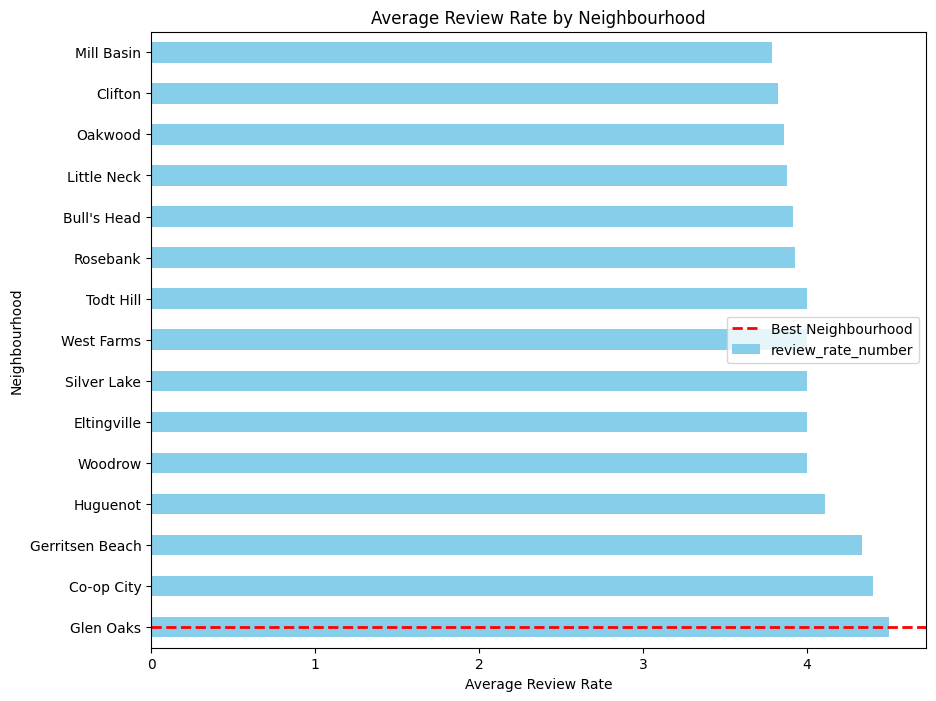

In [337]:
average_review_rate_sorted = average_review_rate.sort_values(ascending=False)
some_neighbourhood_average_review_rate = average_review_rate_sorted.head(15)
plt.figure(figsize=(10, 8))
some_neighbourhood_average_review_rate.plot(kind='barh', color='skyblue')
plt.xlabel('Average Review Rate')
plt.ylabel('Neighbourhood')
plt.title('Average Review Rate by Neighbourhood')
plt.axhline(y=best_neighbourhood, color='red', linestyle='--', linewidth=2, label='Best Neighbourhood')
plt.legend()
plt.show()

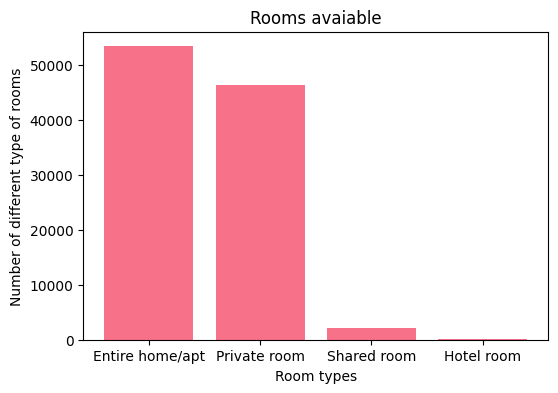

In [338]:
room_types = airbnb_df.room_type.value_counts()
plt.figure(figsize=(6,4))
x = room_types.index
y = room_types
plt.bar(x,y)
plt.xlabel('Room types')
plt.ylabel('Number of different type of rooms')
plt.title('Rooms avaiable')
plt.show()

i can see that most of the airbnbs available in the New York City area are entire homes/apartments, this indicates that they are the most sought after option for example by tourists

Now I want to study the relationship between price and room type, and to do this I use the boxplot<br> https://seaborn.pydata.org/generated/seaborn.boxplot.html

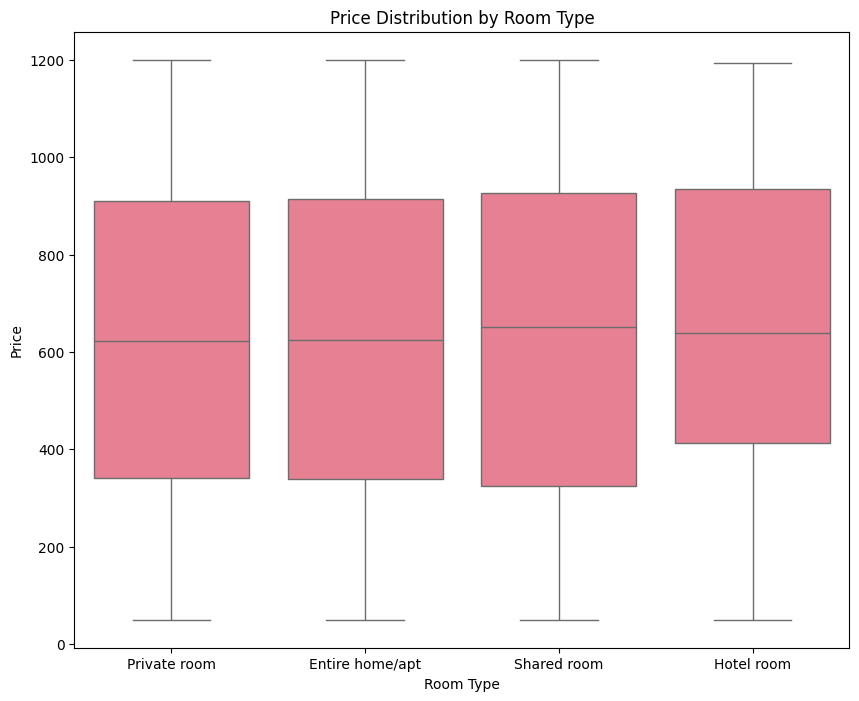

In [339]:
# Grafico a boxplot dei prezzi in base al tipo di camera
plt.figure(figsize=(10, 8))
sns.boxplot(x='room_type', y='price', data=airbnb_df)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.show()

I observe that the median is similar for the different room types quidni the average prices of the different room_types are similar. I observe that the lower end of the boxplot related to hotel room is higher than those of the other room stipologies, this could mean that for hotel room there are data with higher prices, but not too much to be considered outliers. one thus aha a greater variety of prices within that room type but without a significant difference in the median.
I want to look more closely at hotel room prices to better understand the price distribution of those airbnbs.

To visualize the price distribution for hotel room versus other room types I use the violin plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html

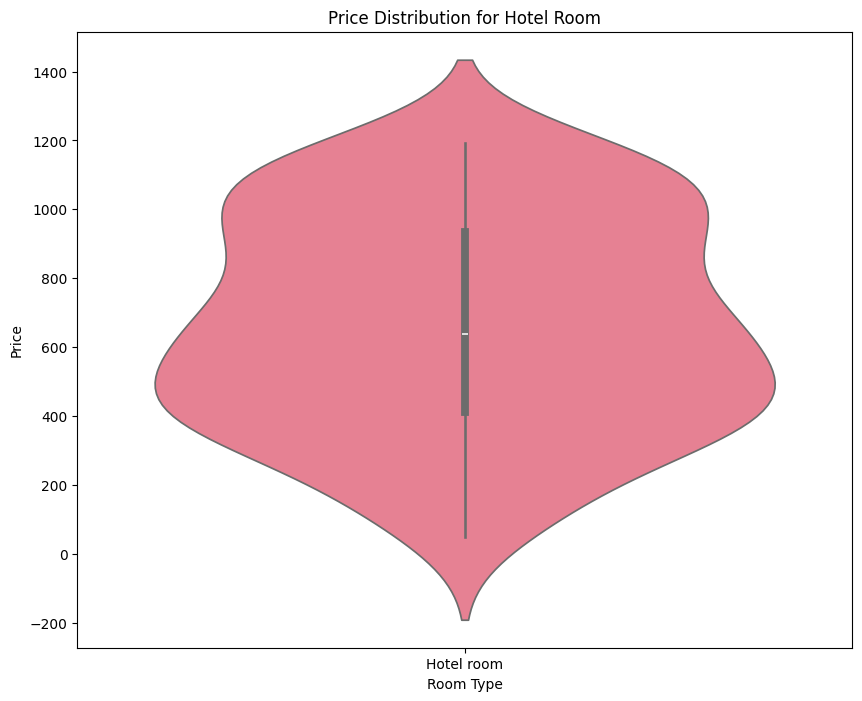

In [340]:
# I filter the data only for the hotel room you want to analyze
hotel_room_data = airbnb_df[airbnb_df['room_type'] == 'Hotel room']

# I create the violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='room_type', y='price', data=hotel_room_data)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution for Hotel Room')
plt.show()


From this plot you can see that there are no outliers, the violin plot is symmetrical so the distribution of data is balanced and therefore so are the prices, and I observe that the highest density of data occurs between $400 and $600 per day